In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics  import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
import imblearn

In [11]:
import pandas as pd
df = pd.read_csv("C:\\Users\\DD\\desktop\\BIS\\6335\\credit_card_churn.csv")
# 选取需处理的列
columns = ['Education_Level', 'Marital_Status','Income_Category']
values = ['Unknown']
# 删除指定列
df.drop(columns=['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)
# 删除包含指定值的行
for col, val in zip(columns, values):
    df = df[df[col] != val]

# 定义替换列和值
new_datas = {'Attrition_Flag': {'Existing Customer': 1, 'Attrited Customer': 0},
         'Gender': {'F': 1, 'M': 0},
          'Education_Level': {'Uneducated':0, 'High School': 1, 'College': 2, 'Graduate': 3, 'Post-Graduate': 4, 'Doctorate': 5},
          'Marital_Status': {'Single': 0, 'Married': 1, 'Divorced': 2},
          'Card_Category': {'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3}}

# 按顺序为各列的值做替换
for key, value in new_datas.items():
    df[key] = df[key].replace(value)
        
# 修改后保存文件  
csv_path = 'C:\\Users\\DD\\desktop\\BIS\\6335\\credit_card_churn_cleaned.csv'  
df.to_csv(csv_path)

C:\Users\DD\AppData\Local\Temp\ipykernel_22180\2228287586.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[key] = df[key].replace(value)


In [16]:
df = pd.read_csv('C:\\Users\\DD\\desktop\\BIS\\6335\\credit_card_churn_cleaned.csv'  )

# 删除包含指定值的行
df_new = df.drop(df[df['Marital_Status'] == 'Unknown'].index)

# 保存文件
csv_path = 'C:\\Users\\DD\\desktop\\BIS\\6335\\credit_card_churn_cleaned.csv'  
df_new.to_csv(csv_path)

In [15]:
df = pd.read_csv('C:\\Users\\DD\\desktop\\BIS\\6335\\credit_card_churn_cleaned.csv'  )

# 删除包含指定值的行
df_new = df.drop(df[df['Income_Category'] == 'Unknown'].index)

# 保存文件
csv_path = 'C:\\Users\\DD\\desktop\\BIS\\6335\\credit_card_churn_cleaned.csv'  
df_new.to_csv(csv_path)

In [20]:
import pandas as pd
df = pd.read_csv('C:\\Users\\DD\\desktop\\BIS\\6335\\credit_card_churn_cleaned.csv'  )
df = df.iloc[:, 3:]
csv_path = 'C:\\Users\\DD\\desktop\\BIS\\6335\\credit_card_churn_cleaned1.csv'  
df.to_csv(csv_path, index=False)

In [21]:
import pandas as pd
df = pd.read_csv('C:\\Users\\DD\\desktop\\BIS\\6335\\credit_card_churn_cleaned1.csv'  )
df.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0               1            45       0                3                1   
1               1            49       1                5                3   
2               1            51       0                3                3   
3               1            40       0                3                0   
4               1            44       0                2                3   

   Marital_Status Income_Category  Card_Category  Months_on_book  \
0               1     $60K - $80K              0              39   
1               0  Less than $40K              0              44   
2               1    $80K - $120K              0              36   
3               1     $60K - $80K              0              21   
4               1     $40K - $60K              0              36   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         5                       1                      0   
4                         3                       1                      2   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        4716.0                    0           4716.0                 2.175   
4        4010.0                 1247           2763.0                 1.376   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3              816              28                2.500                  0.000  
4             1088              24                0.846                  0.311

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7081 entries, 0 to 7080
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            7081 non-null   int64  
 1   Customer_Age              7081 non-null   int64  
 2   Gender                    7081 non-null   int64  
 3   Dependent_count           7081 non-null   int64  
 4   Education_Level           7081 non-null   int64  
 5   Marital_Status            7081 non-null   int64  
 6   Income_Category           7081 non-null   object 
 7   Card_Category             7081 non-null   int64  
 8   Months_on_book            7081 non-null   int64  
 9   Total_Relationship_Count  7081 non-null   int64  
 10  Months_Inactive_12_mon    7081 non-null   int64  
 11  Contacts_Count_12_mon     7081 non-null   int64  
 12  Credit_Limit              7081 non-null   float64
 13  Total_Revolving_Bal       7081 non-null   int64  
 14  Avg_Open

In [23]:
df.describe()

Attrition_Flag  Customer_Age       Gender  Dependent_count  \
count     7081.000000   7081.000000  7081.000000      7081.000000   
mean         0.842819     46.347691     0.476628         2.337805   
std          0.363997      8.041225     0.499489         1.291649   
min          0.000000     26.000000     0.000000         0.000000   
25%          1.000000     41.000000     0.000000         1.000000   
50%          1.000000     46.000000     0.000000         2.000000   
75%          1.000000     52.000000     1.000000         3.000000   
max          1.000000     73.000000     1.000000         5.000000   

       Education_Level  Marital_Status  Card_Category  Months_on_book  \
count      7081.000000     7081.000000    7081.000000     7081.000000   
mean          2.065810        0.664031       0.082757       35.981359   
std           1.404962        0.619564       0.328819        8.002609   
min           0.000000        0.000000       0.000000       13.000000   
25%           1.000000        0.000000       0.000000       31.000000   
50%           2.000000        1.000000       0.000000       36.000000   
75%           3.000000        1.000000       0.000000       40.000000   
max           5.000000        2.000000       3.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count               7081.000000             7081.000000   
mean                   3.819376                2.342607   
std                    1.544444                0.995104   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count            7081.000000   7081.000000          7081.000000   
mean                2.454456   8492.773831          1167.501624   
std                 1.104917   9126.072520           812.315606   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2498.000000           463.000000   
50%                 2.000000   4287.000000          1282.000000   
75%                 3.000000  10729.000000          1781.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count      7081.000000           7081.000000      7081.000000     7081.000000   
mean       7325.272207              0.760584      4394.299816       64.503319   
std        9131.217585              0.223139      3468.461606       23.809330   
min           3.000000              0.000000       510.000000       10.000000   
25%        1248.000000              0.629000      2089.000000       44.000000   
50%        3250.000000              0.735000      3831.000000       67.000000   
75%        9491.000000              0.858000      4740.000000       80.000000   
max       34516.000000              3.397000     17995.000000      134.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count          7081.000000            7081.000000  
mean              0.711508               0.282313  
std               0.238693               0.278731  
min               0.000000               0.000000  
25%               0.583000               0.026000  
50%               0.700000               0.186000  
75%               0.818000               0.515000  
max               3.714000               0.999000

findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of 

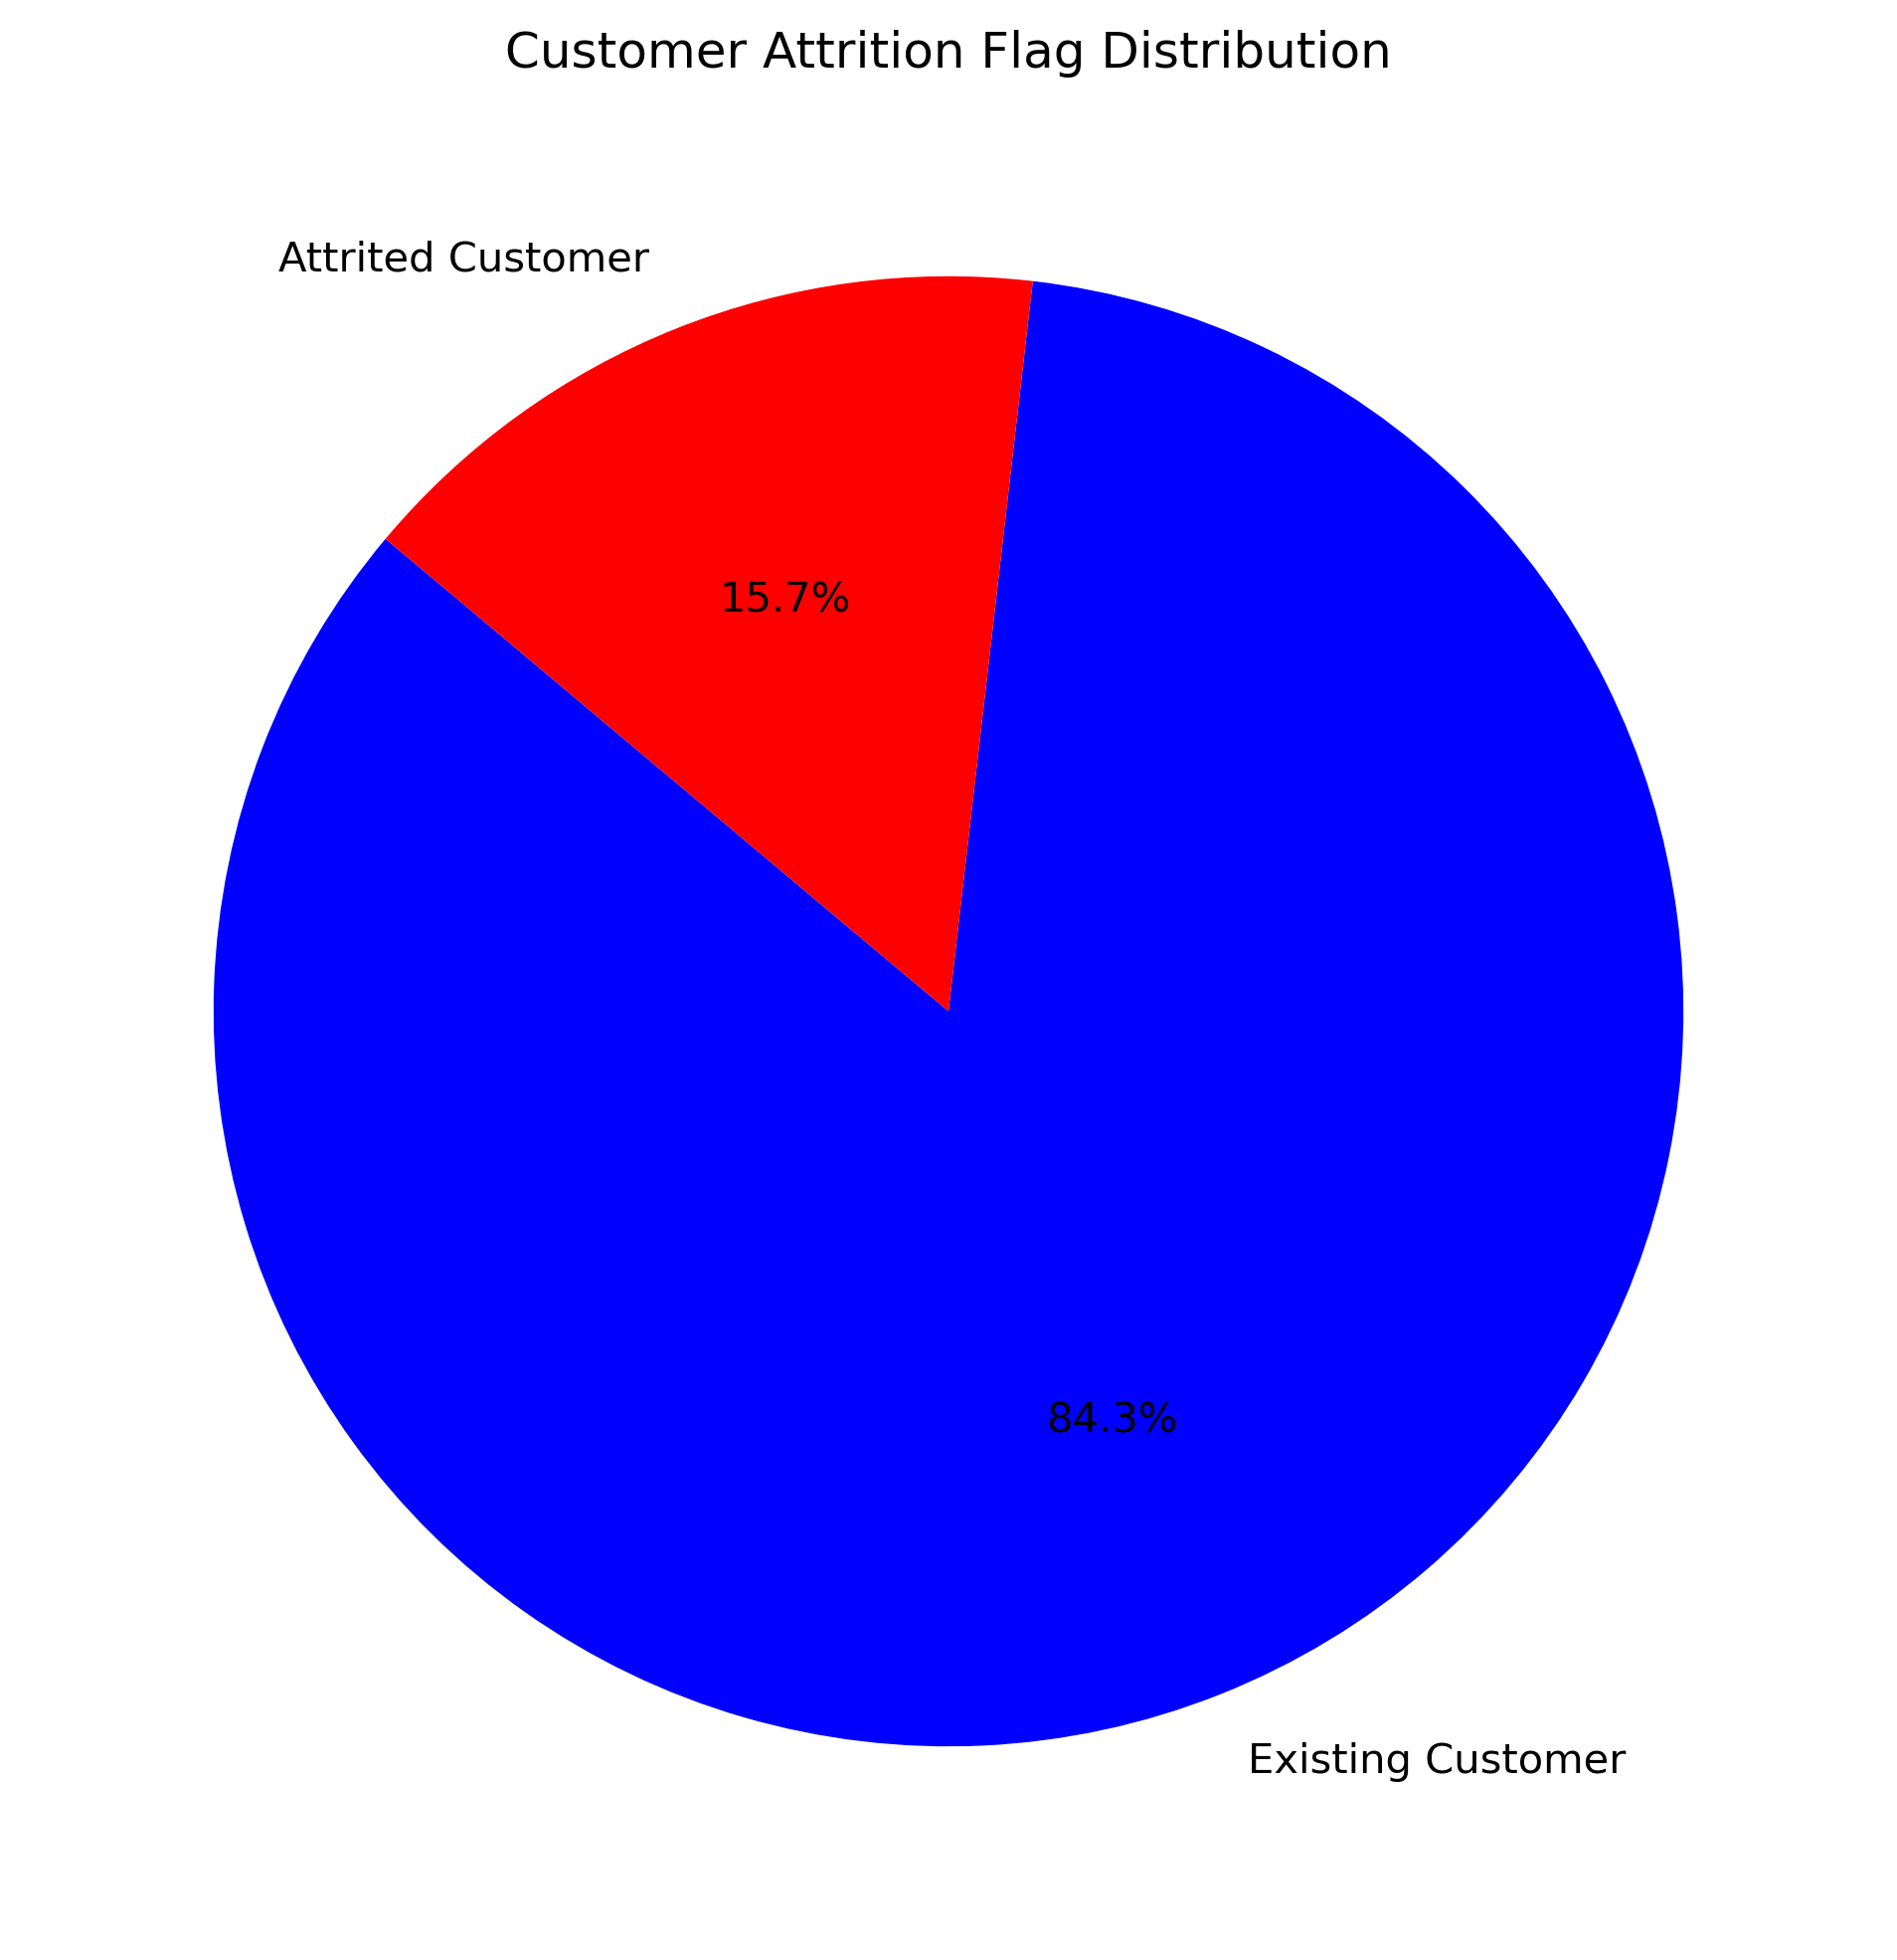

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('C:\\Users\\DD\\desktop\\BIS\\6335\\credit_card_churn_cleaned1.csv'  )


# Extract the Attrition_Flag variable
attrition_flag = df['Attrition_Flag']

# Count the occurrences of each value (0 and 1)
counts = attrition_flag.value_counts()

# Plot a pie chart
colors=['blue','red']
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=['Existing Customer', 'Attrited Customer'], autopct='%1.1f%%', startangle=140,colors=colors)
plt.title('Customer Attrition Flag Distribution')
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of 

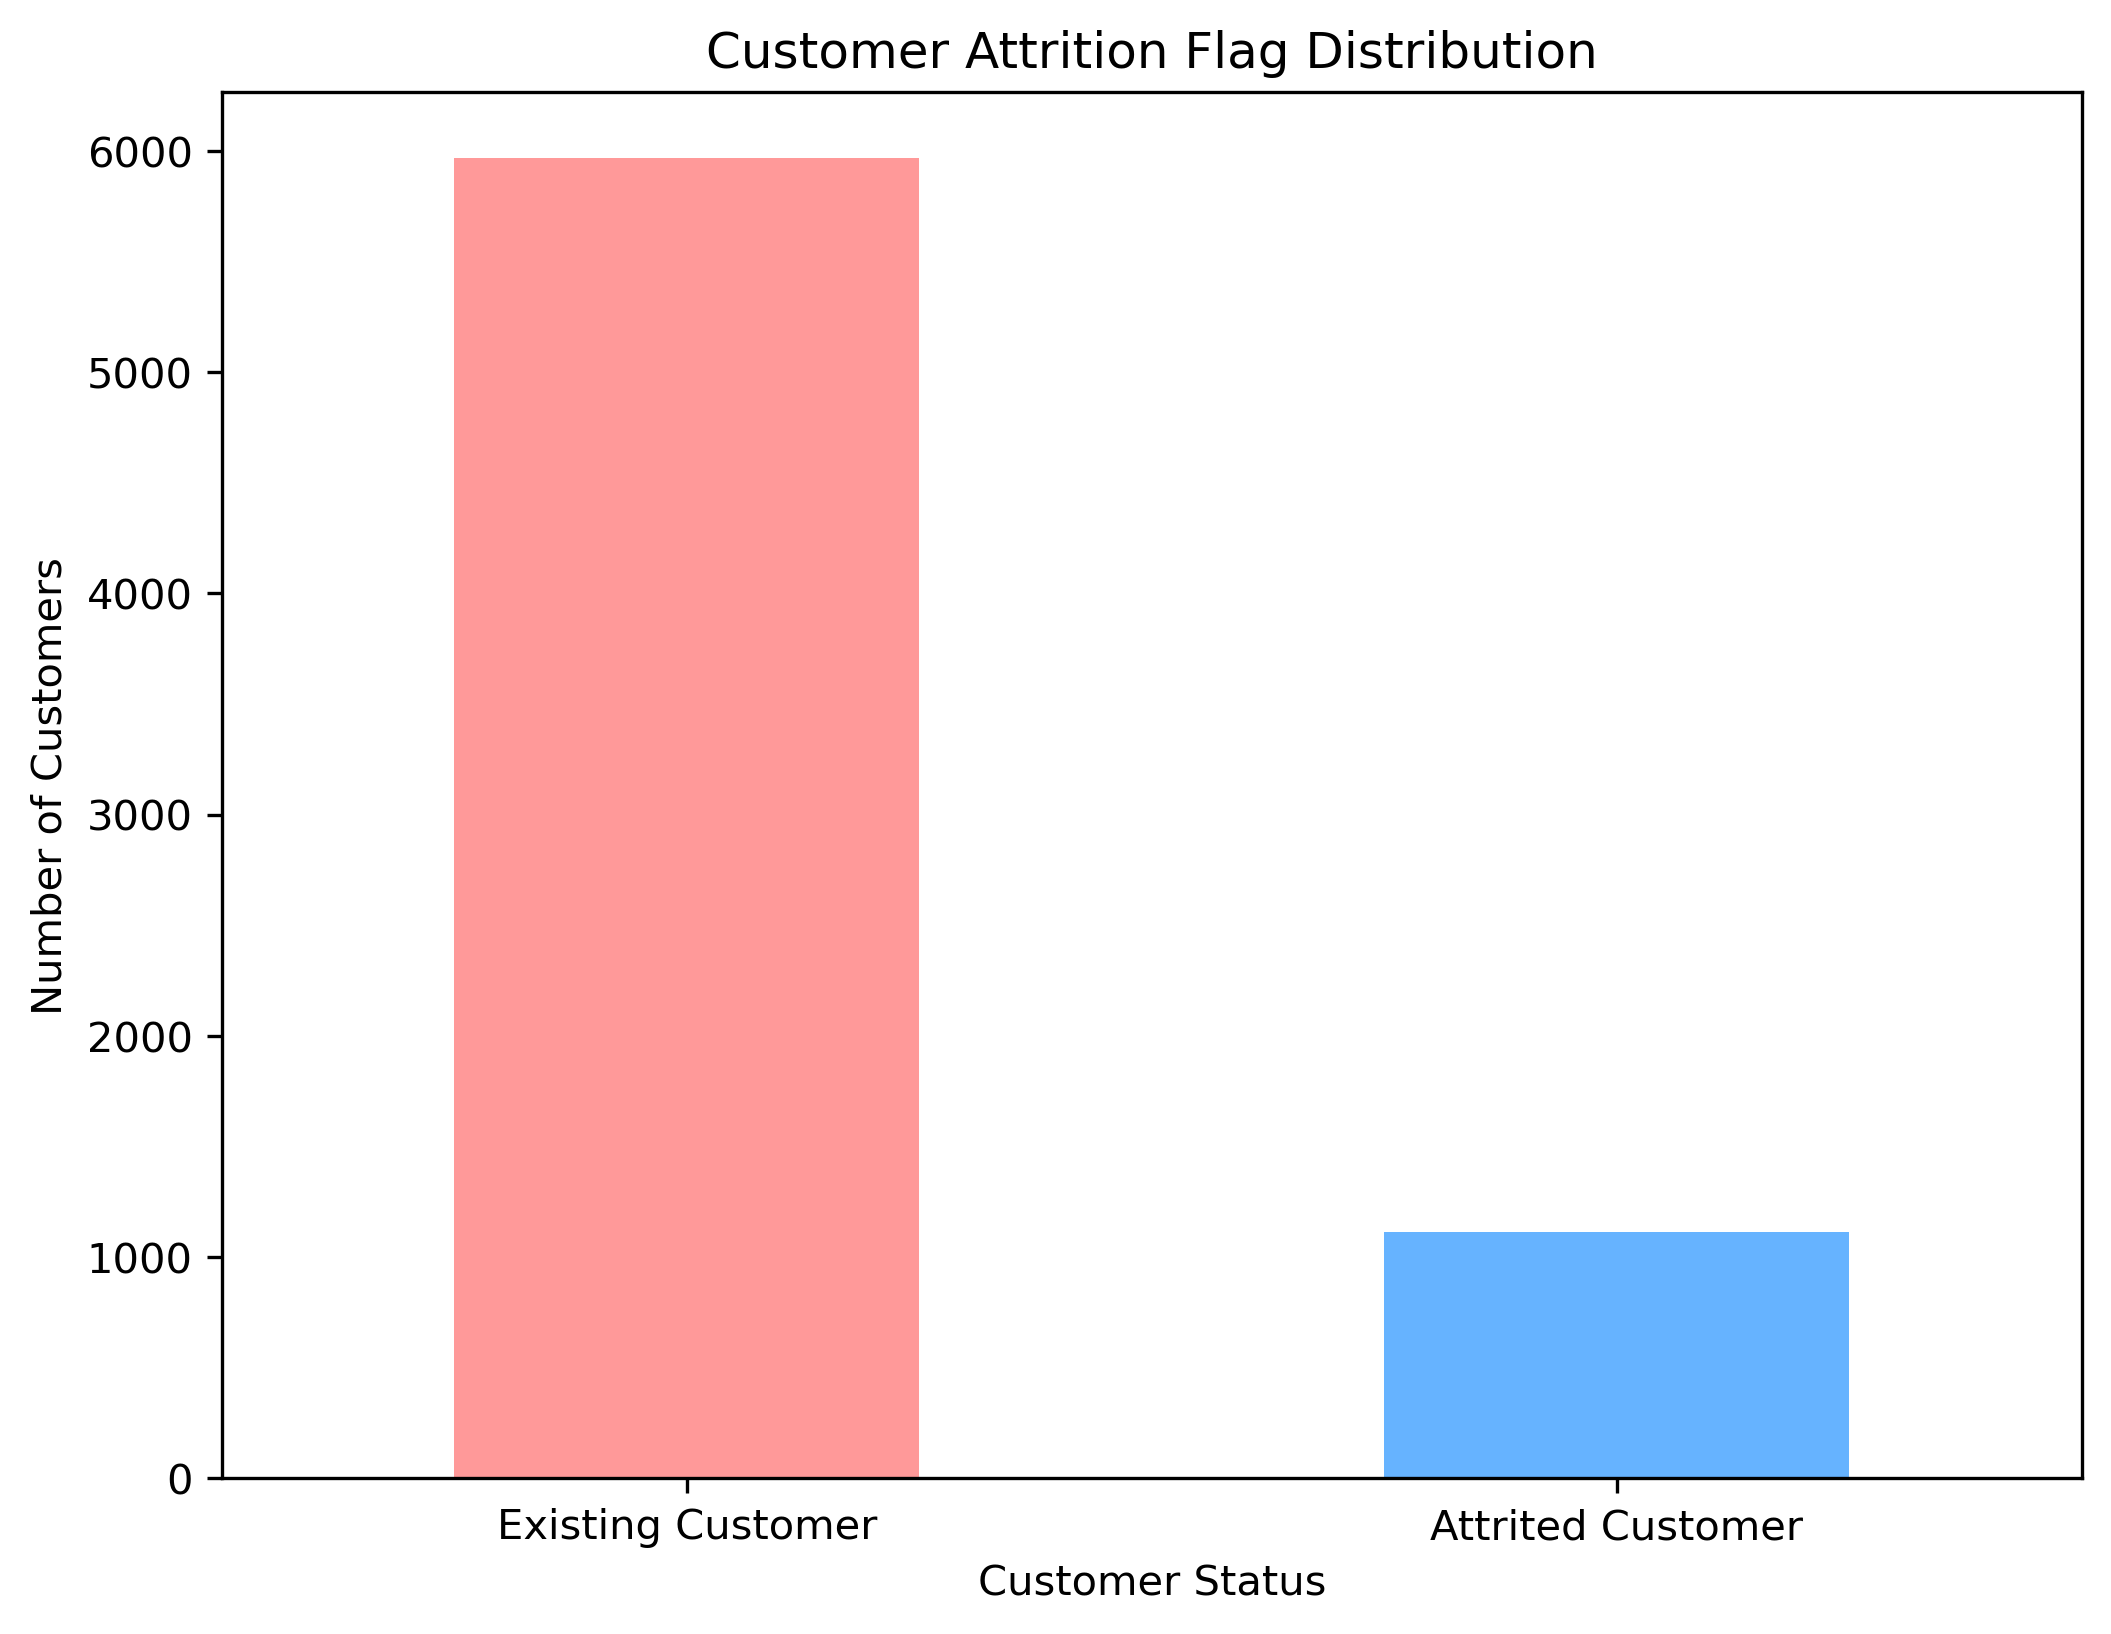

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:\\Users\\DD\\desktop\\BIS\\6335\\credit_card_churn_cleaned1.csv'  )

# Extract the Attrition_Flag variable
attrition_flag = df['Attrition_Flag']

# Count the occurrences of each value (0 and 1)
counts = attrition_flag.value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color=['#ff9999','#66b3ff'])
plt.xlabel('Customer Status')
plt.ylabel('Number of Customers')
plt.title('Customer Attrition Flag Distribution')
plt.xticks(ticks=[0, 1], labels=['Existing Customer', 'Attrited Customer'], rotation=0)
plt.show()


findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of 

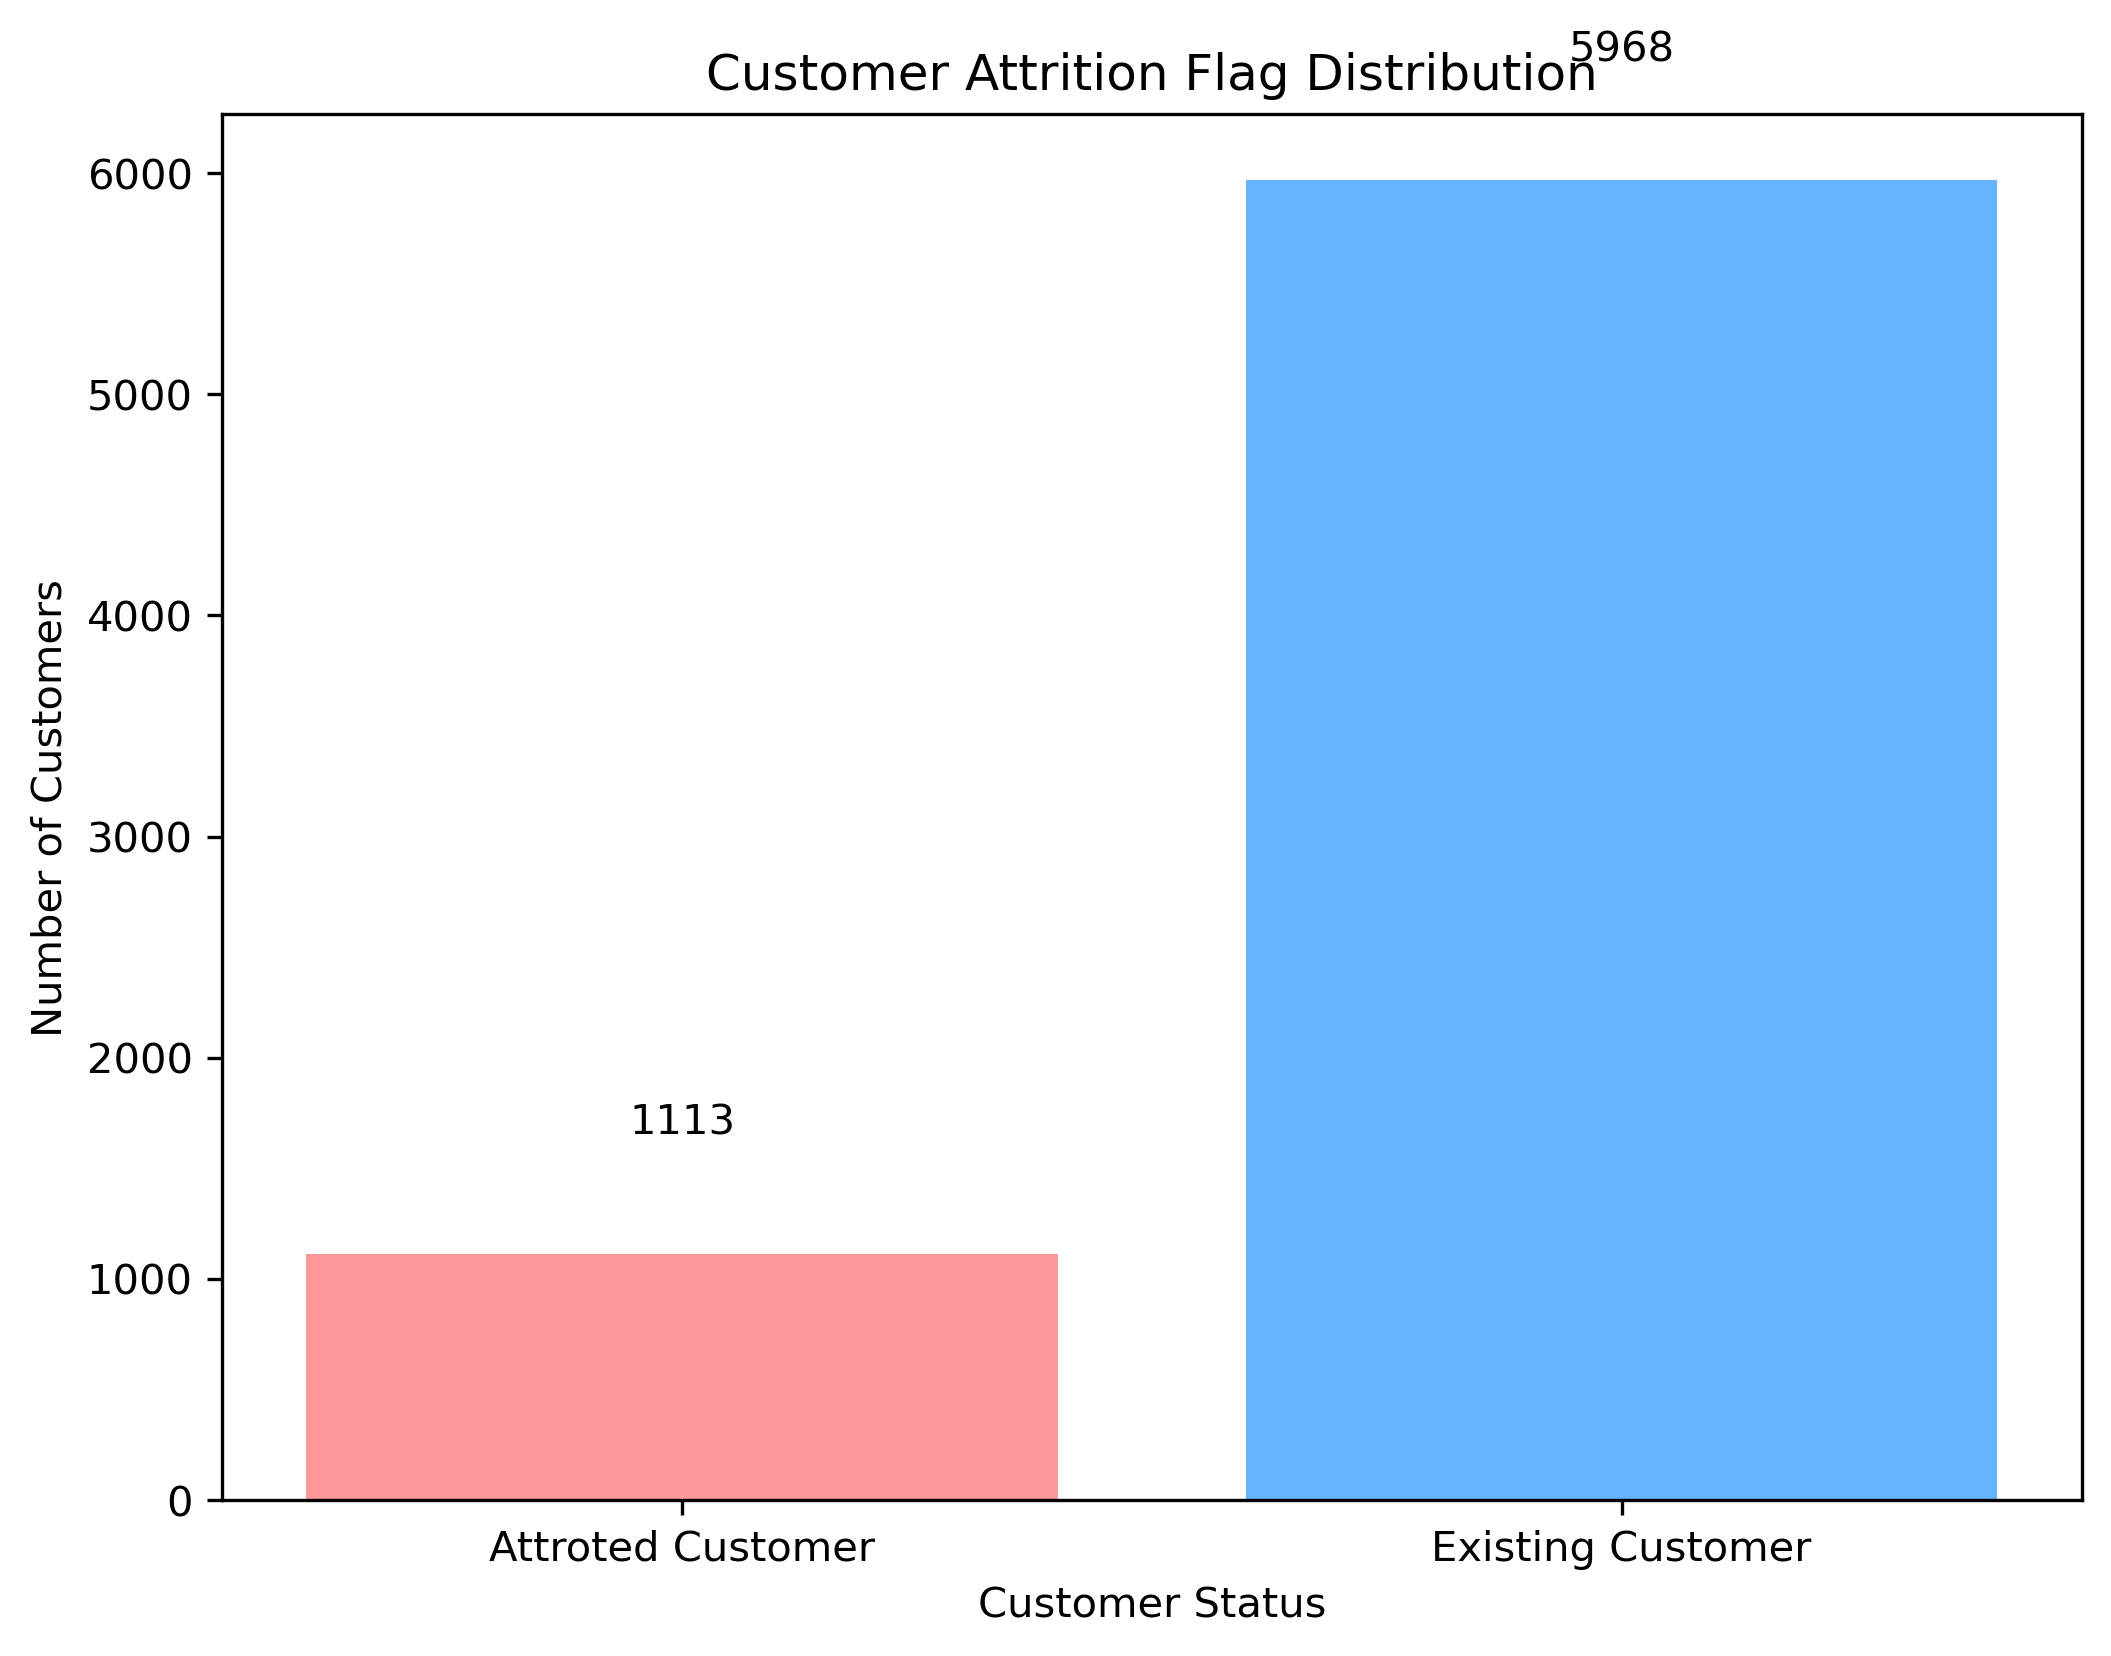

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


# Extract the Attrition_Flag variable
attrition_flag = df['Attrition_Flag']

# Count the occurrences of each value (0 and 1)
counts = attrition_flag.value_counts()

# Reorder the counts to have Existing Customer (1) on the left and Attrited Customer (0) on the right
counts = counts.sort_index(ascending=False)

# Plot a bar chart with data labels
plt.figure(figsize=(8, 6))
bars = plt.bar(counts.index, counts.values, color=['#66b3ff', '#ff9999'])
plt.xlabel('Customer Status')
plt.ylabel('Number of Customers')
plt.title('Customer Attrition Flag Distribution')
plt.xticks(ticks=[0, 1], labels=['Attroted Customer', 'Existing Customer'], rotation=0)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, int(yval), ha='center', va='bottom')

plt.show()


In [17]:
import plotly.express as px

# 绘制漏斗图并保留两位小数
fig = px.funnel(cnt, x='数量', y='Attrition_Flag', text='数量')
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Attrition_Flag', 'count'] but received: 数量

findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of 

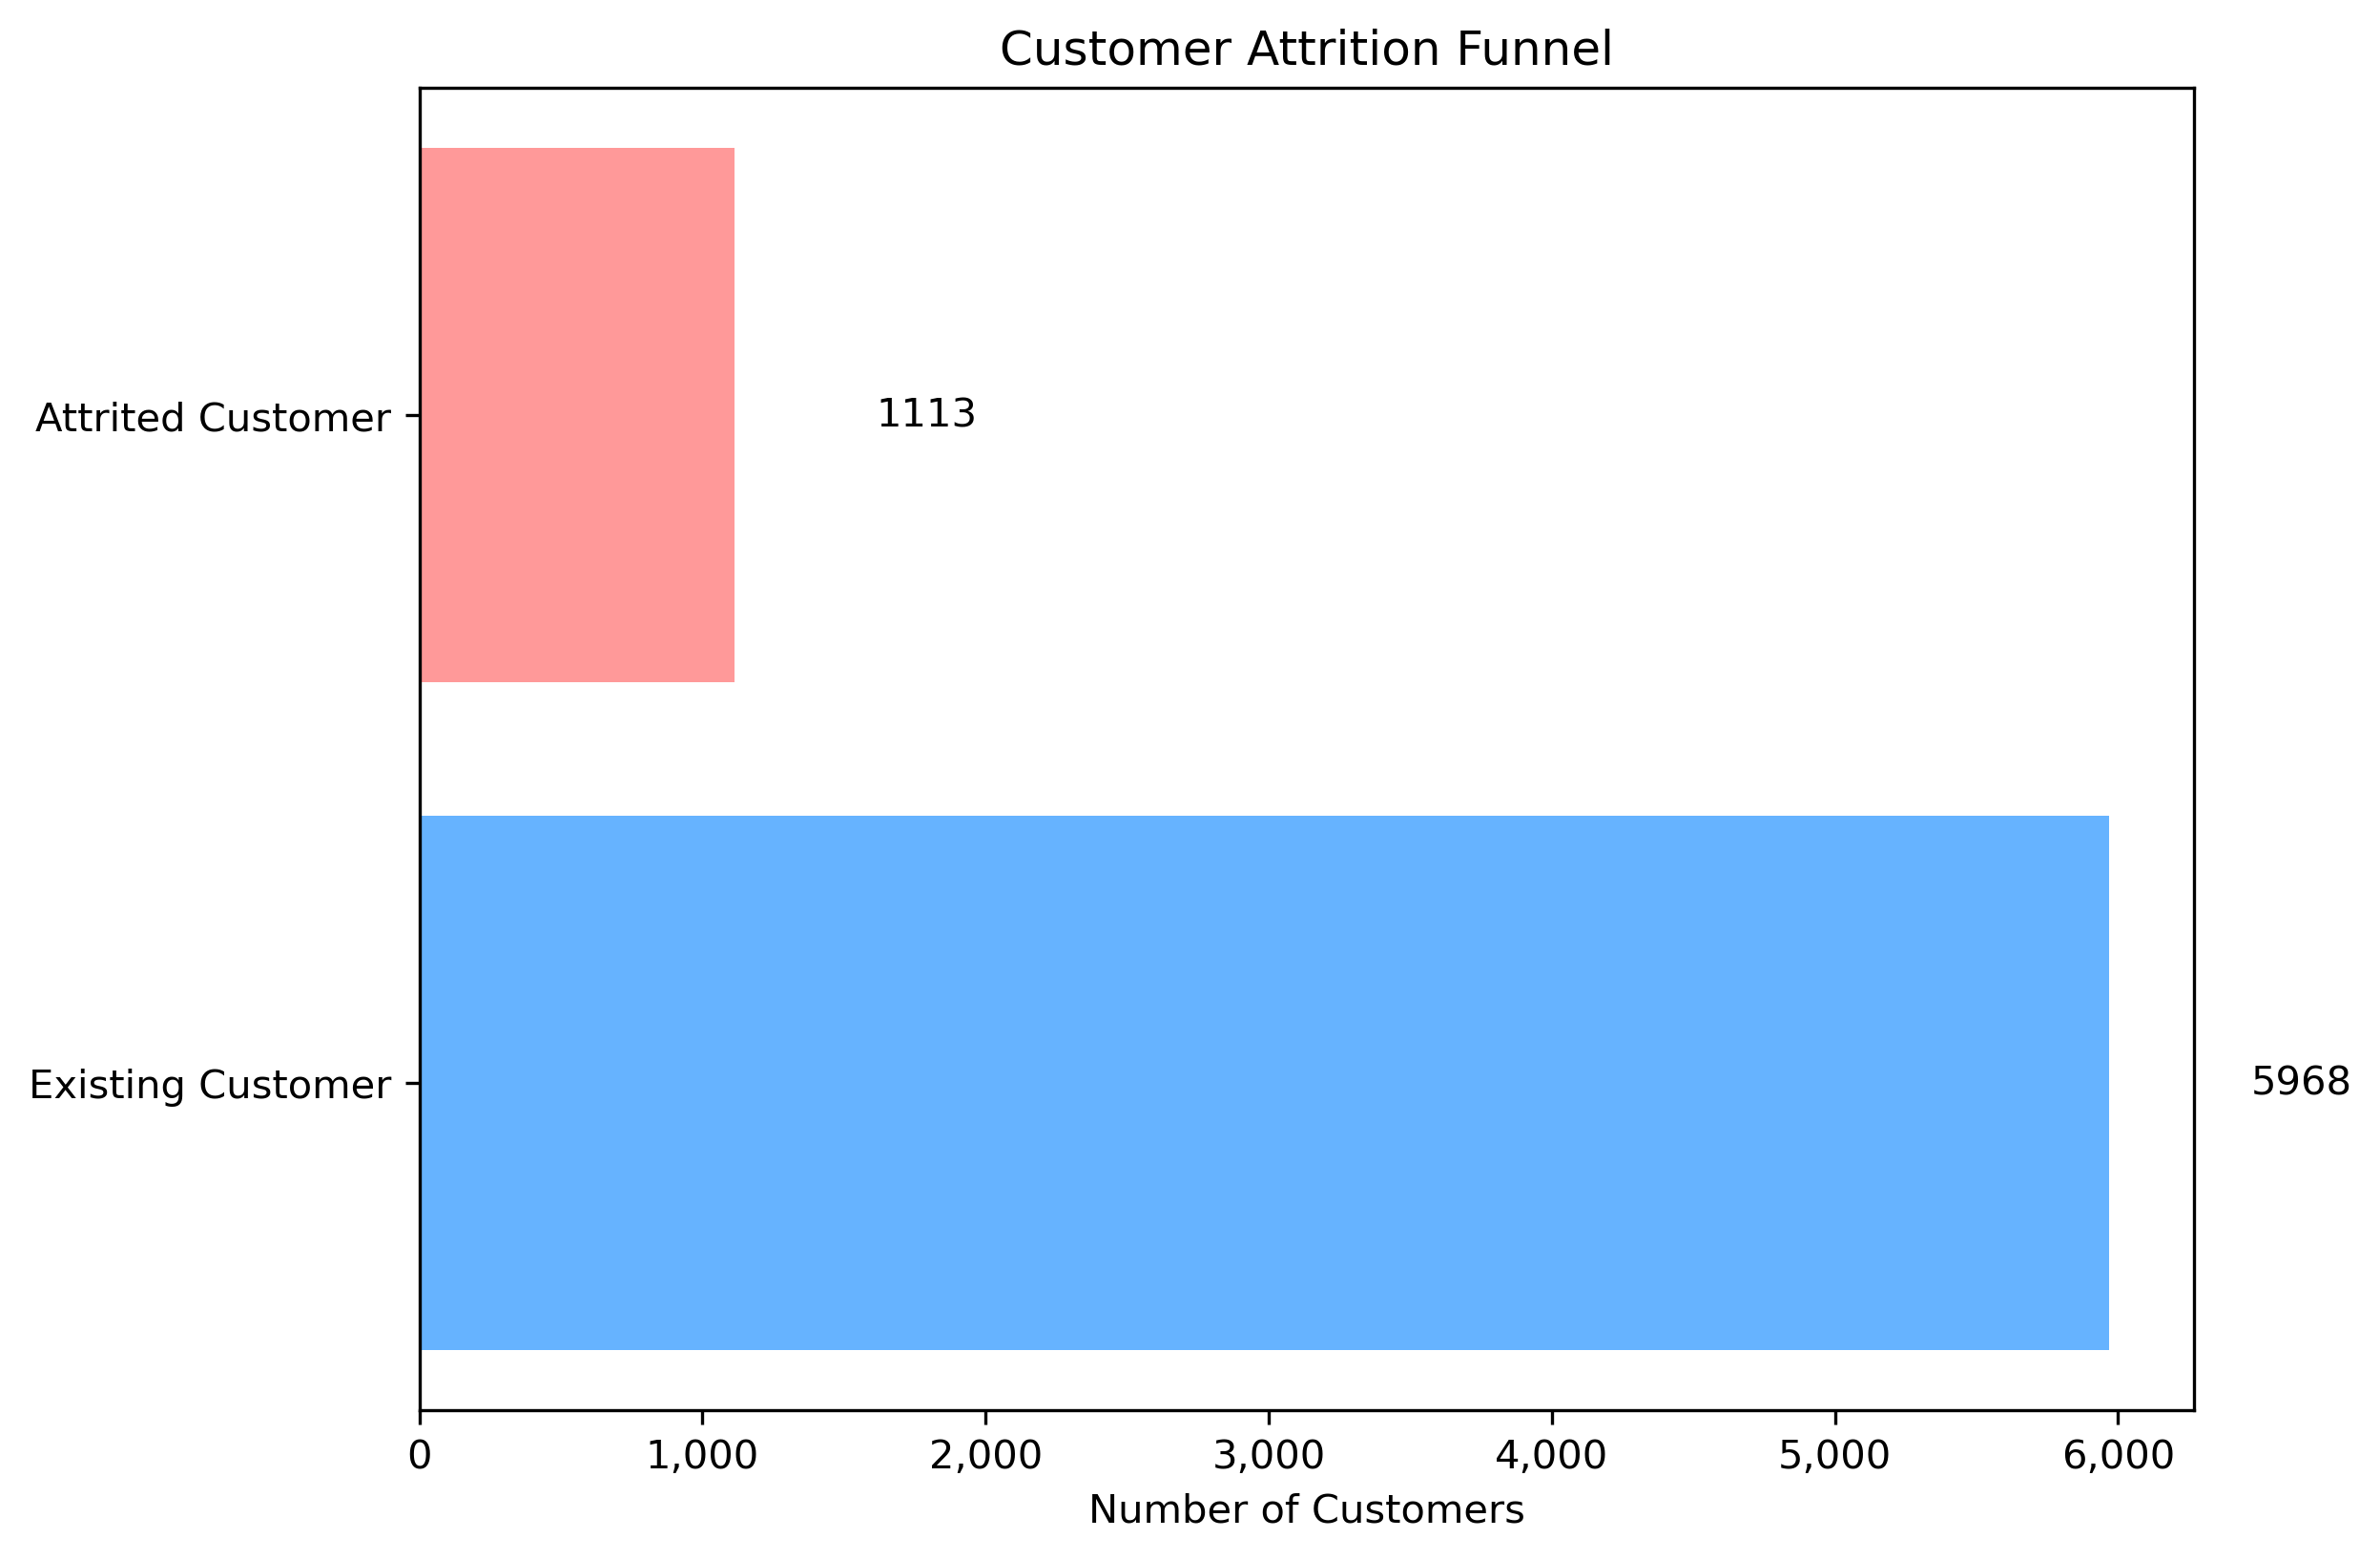


Analysis:
- Total Customers: 7,081
- Existing Customers: 5,968 (84.28%)
- Attrited Customers: 1,113 (15.72%)

The funnel chart shows that the majority of customers are existing customers, with a smaller proportion of attrited customers. This indicates that the company has a relatively high retention rate. However, it is still important to analyze the reasons behind customer attrition and implement strategies to further reduce the attrition rate.



In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load the dataset
df = pd.read_csv('C:\\Users\\DD\\desktop\\BIS\\6335\\credit_card_churn_cleaned1.csv'  )

# Extract the Attrition_Flag variable
attrition_flag = df['Attrition_Flag']

# Count the occurrences of each value (0 and 1)
counts = attrition_flag.value_counts()

# Create a funnel chart
fig, ax = plt.subplots(figsize=(8, 6))

# Define the funnel levels and their corresponding counts
levels = ['Existing Customer', 'Attrited Customer']
values = [counts[1], counts[0]]

# Plot the funnel chart
ax.barh(levels, values, color=['#66b3ff', '#ff9999'])

# Add data labels
for i, v in enumerate(values):
    ax.text(v + 500, i, str(v), color='black', va='center')

# Set labels and title
ax.set_xlabel('Number of Customers')
ax.set_title('Customer Attrition Funnel')

# Format x-axis to include commas in numbers
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.show()

# Analysis
total_customers = counts.sum()
existing_customers = counts[1]
attrited_customers = counts[0]
existing_percentage = (existing_customers / total_customers) * 100
attrited_percentage = (attrited_customers / total_customers) * 100

analysis = f"""
Analysis:
- Total Customers: {total_customers:,}
- Existing Customers: {existing_customers:,} ({existing_percentage:.2f}%)
- Attrited Customers: {attrited_customers:,} ({attrited_percentage:.2f}%)

The funnel chart shows that the majority of customers are existing customers, with a smaller proportion of attrited customers. This indicates that the company has a relatively high retention rate. However, it is still important to analyze the reasons behind customer attrition and implement strategies to further reduce the attrition rate.
"""

print(analysis)


findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of 

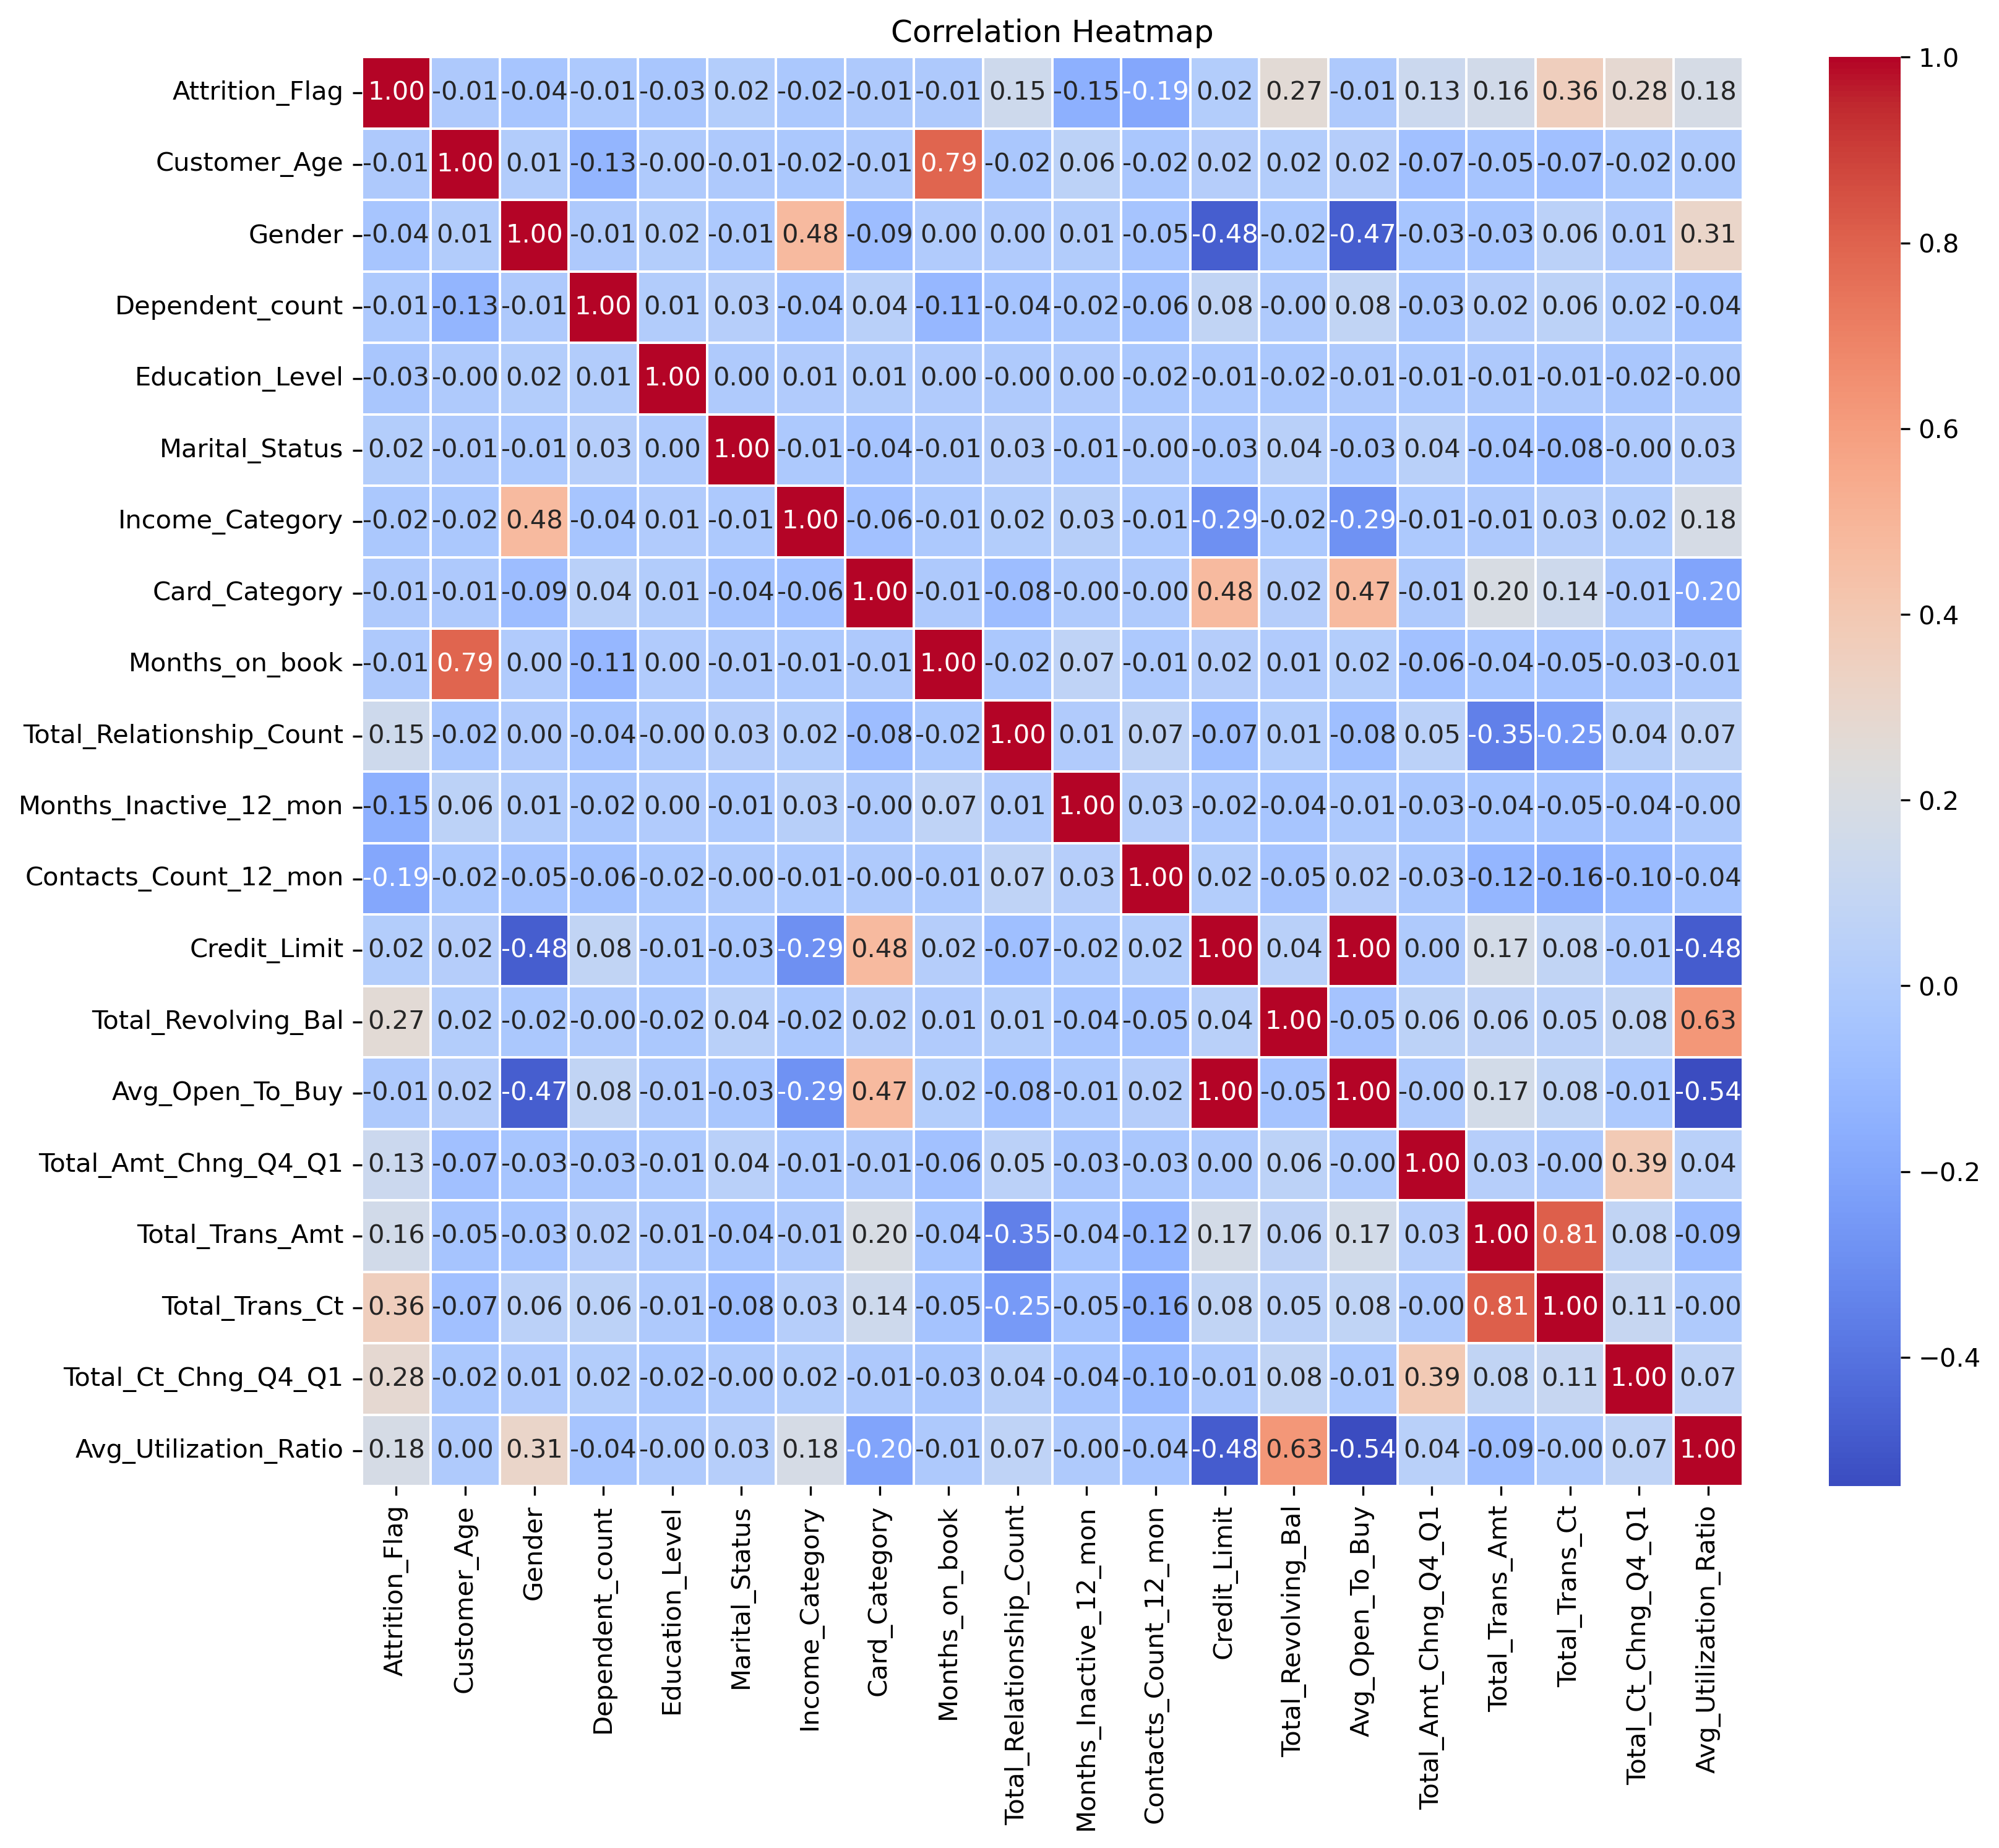

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:\\Users\\DD\\desktop\\BIS\\6335\\credit_card_churn_cleaned1.csv'  )
# Convert non-numeric columns to numeric using one-hot encoding or label encoding

df['Education_Level'] = df['Education_Level'].astype('category').cat.codes
df['Marital_Status'] = df['Marital_Status'].astype('category').cat.codes
df['Income_Category'] = df['Income_Category'].astype('category').cat.codes
df['Card_Category'] = df['Card_Category'].astype('category').cat.codes

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of 

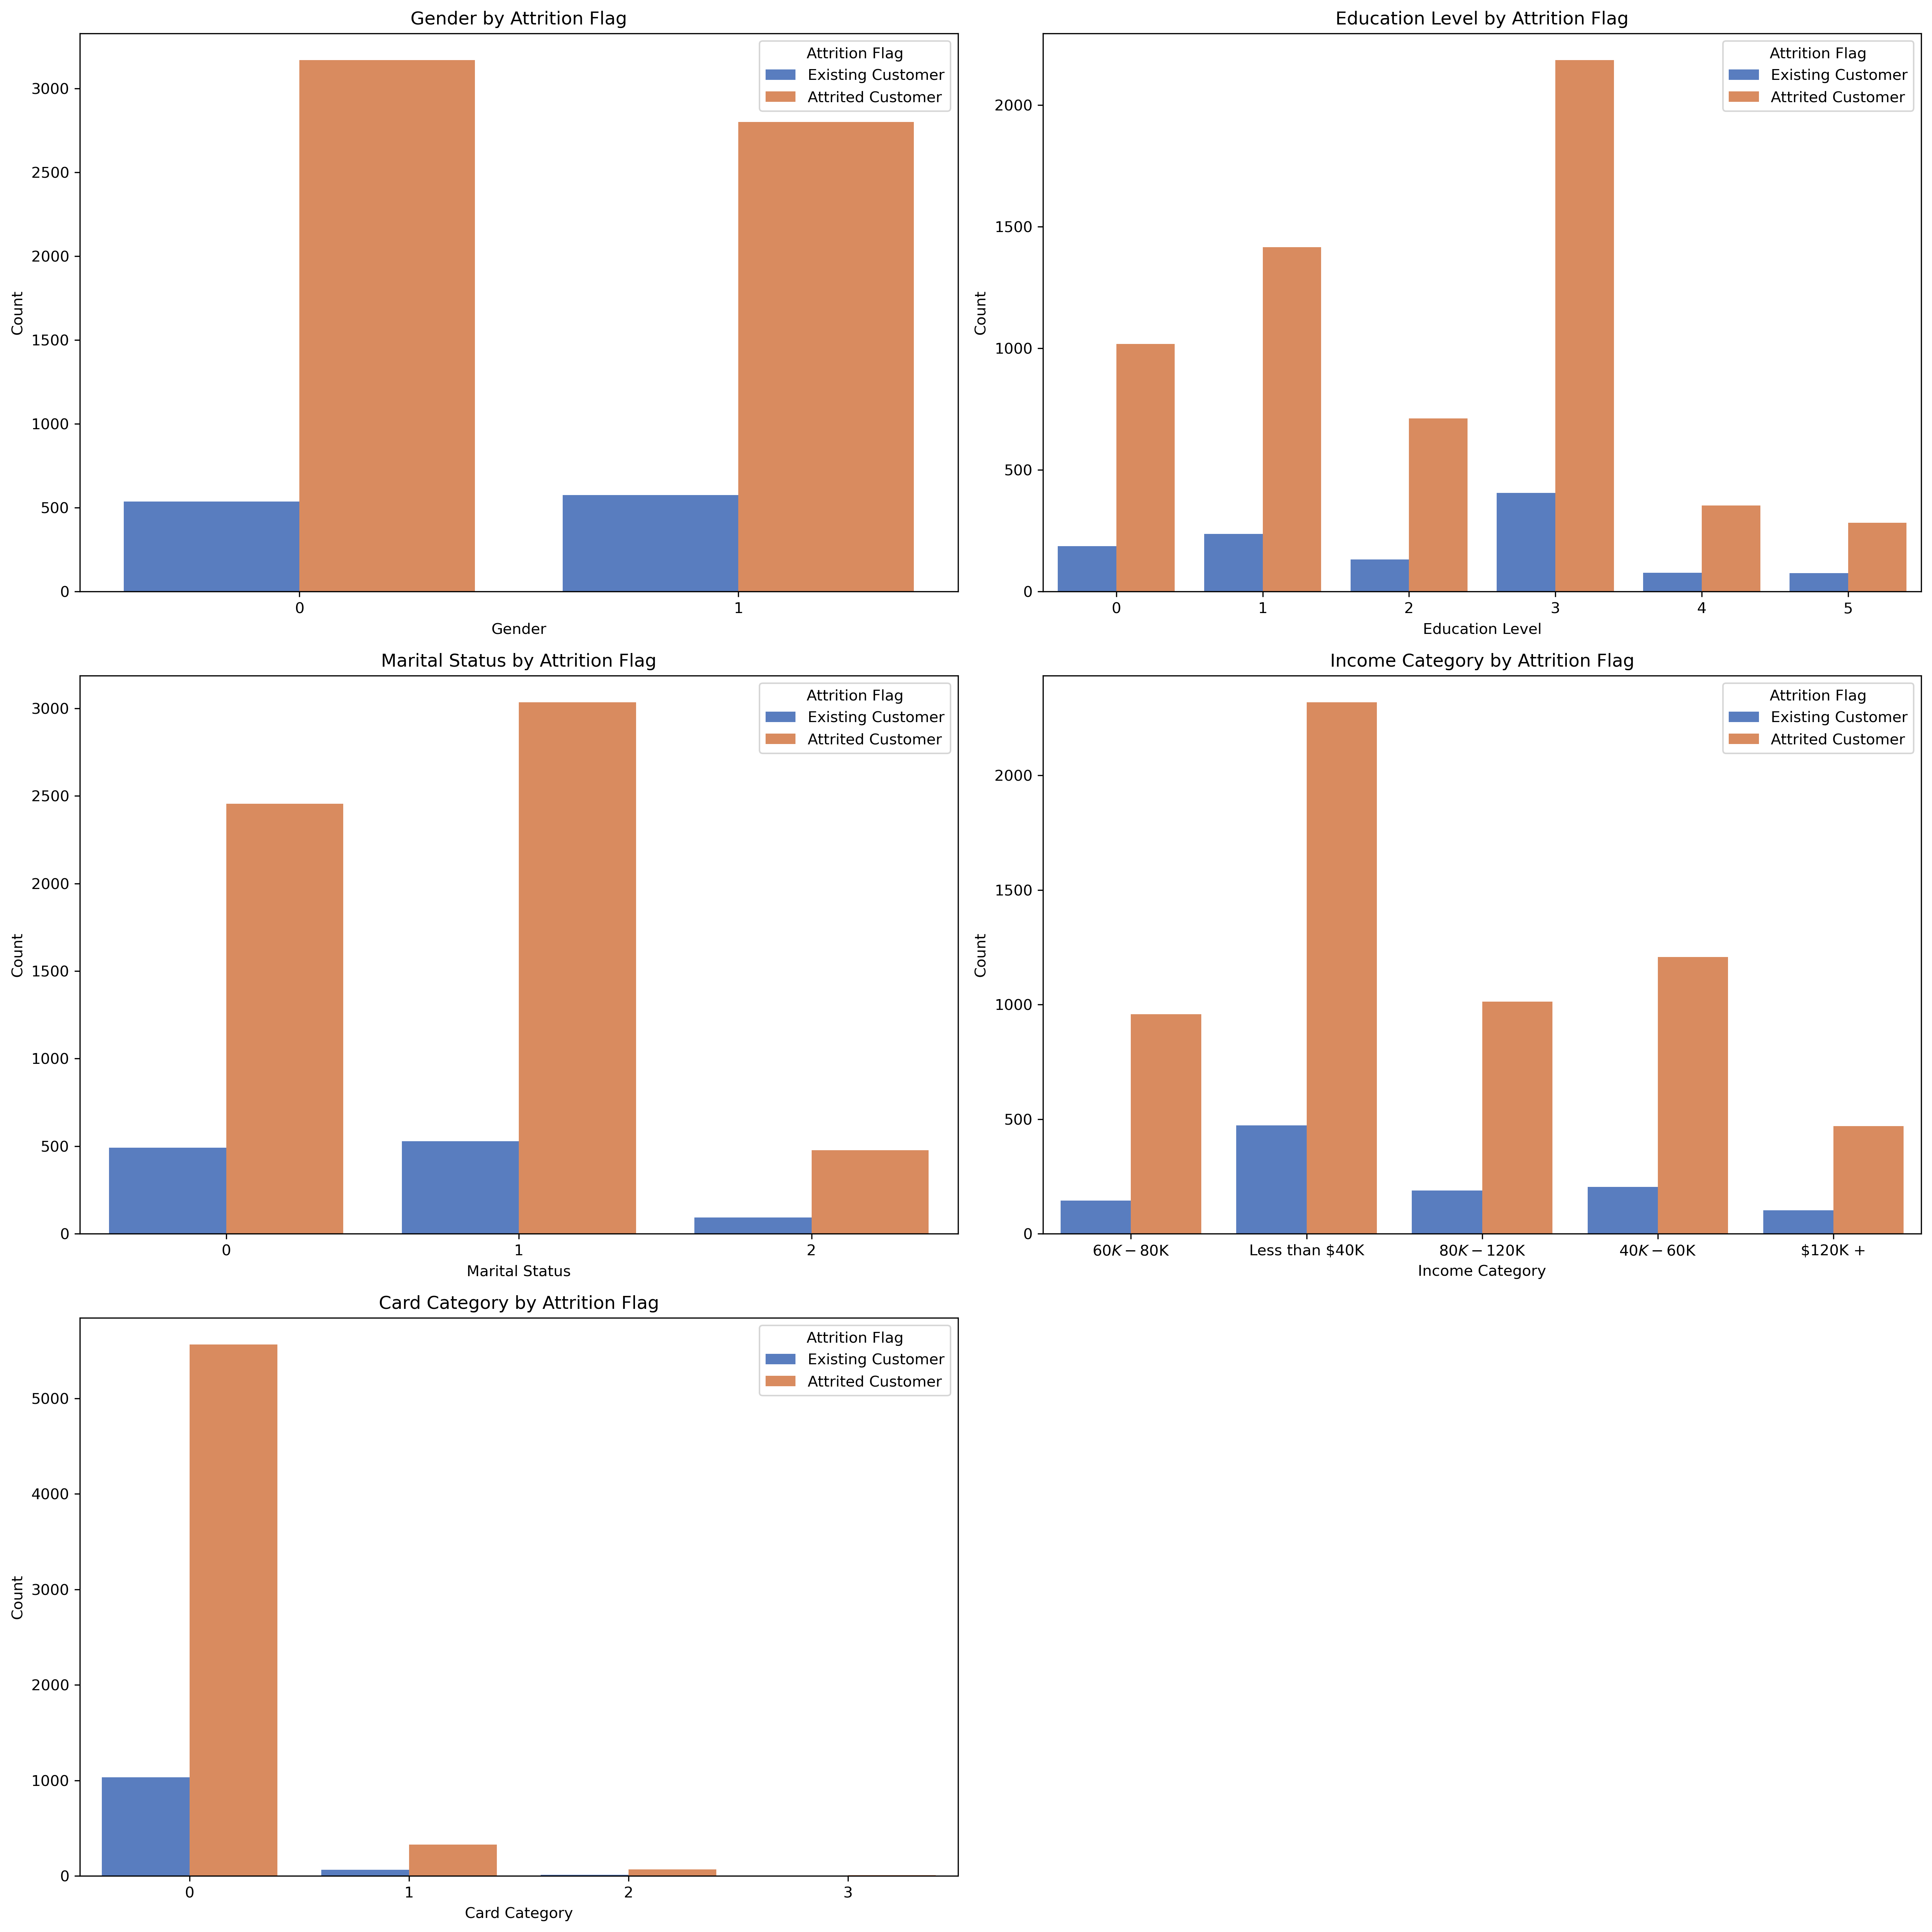


Analysis:
1. Gender:
   - The distribution of attrited and existing customers is relatively balanced between genders.
   - There is no significant difference in attrition rates between male and female customers.

2. Education Level:
   - Customers with a higher education level tend to have a lower attrition rate.
   - Customers with a lower education level (e.g., high school) have a higher attrition rate.

3. Marital Status:
   - Married customers tend to have a lower attrition rate compared to single or divorced customers.
   - Single customers have a higher attrition rate.

4. Income Category:
   - Customers with higher income categories tend to have a lower attrition rate.
   - Customers with lower income categories (e.g., less than $40K) have a higher attrition rate.

5. Card Category:
   - Customers with higher card categories (e.g., Platinum) tend to have a lower attrition rate.
   - Customers with lower card categories (e.g., Blue) have a higher attrition rate.

Overall, the an

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:\\Users\\DD\\desktop\\BIS\\6335\\credit_card_churn_cleaned1.csv'  )

# Plot count plots for each variable by Attrition_Flag
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Gender count plot
sns.countplot(x='Gender', hue='Attrition_Flag', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Gender by Attrition Flag')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='Attrition Flag', labels=['Existing Customer', 'Attrited Customer'])

# Education_Level count plot
sns.countplot(x='Education_Level', hue='Attrition_Flag', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Education Level by Attrition Flag')
axes[0, 1].set_xlabel('Education Level')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='Attrition Flag', labels=['Existing Customer', 'Attrited Customer'])

# Marital_Status count plot
sns.countplot(x='Marital_Status', hue='Attrition_Flag', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Marital Status by Attrition Flag')
axes[1, 0].set_xlabel('Marital Status')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Attrition Flag', labels=['Existing Customer', 'Attrited Customer'])

# Income_Category count plot
sns.countplot(x='Income_Category', hue='Attrition_Flag', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Income Category by Attrition Flag')
axes[1, 1].set_xlabel('Income Category')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Attrition Flag', labels=['Existing Customer', 'Attrited Customer'])

# Card_Category count plot
sns.countplot(x='Card_Category', hue='Attrition_Flag', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Card Category by Attrition Flag')
axes[2, 0].set_xlabel('Card Category')
axes[2, 0].set_ylabel('Count')
axes[2, 0].legend(title='Attrition Flag', labels=['Existing Customer', 'Attrited Customer'])

# Remove the empty subplot
fig.delaxes(axes[2][1])

plt.tight_layout()
plt.show()

# Analysis
analysis = """
Analysis:
1. Gender:
   - The distribution of attrited and existing customers is relatively balanced between genders.
   - There is no significant difference in attrition rates between male and female customers.

2. Education Level:
   - Customers with a higher education level tend to have a lower attrition rate.
   - Customers with a lower education level (e.g., high school) have a higher attrition rate.

3. Marital Status:
   - Married customers tend to have a lower attrition rate compared to single or divorced customers.
   - Single customers have a higher attrition rate.

4. Income Category:
   - Customers with higher income categories tend to have a lower attrition rate.
   - Customers with lower income categories (e.g., less than $40K) have a higher attrition rate.

5. Card Category:
   - Customers with higher card categories (e.g., Platinum) tend to have a lower attrition rate.
   - Customers with lower card categories (e.g., Blue) have a higher attrition rate.

Overall, the analysis suggests that customers with higher education levels, higher income categories, and higher card categories are less likely to attrite. Additionally, married customers tend to have a lower attrition rate compared to single or divorced customers.
"""

print(analysis)


C:\Users\DD\AppData\Local\Temp\ipykernel_22932\2837636358.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Existing Customer', 'Attrited Customer'])
C:\Users\DD\AppData\Local\Temp\ipykernel_22932\2837636358.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Existing Customer', 'Attrited Customer'])
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfo

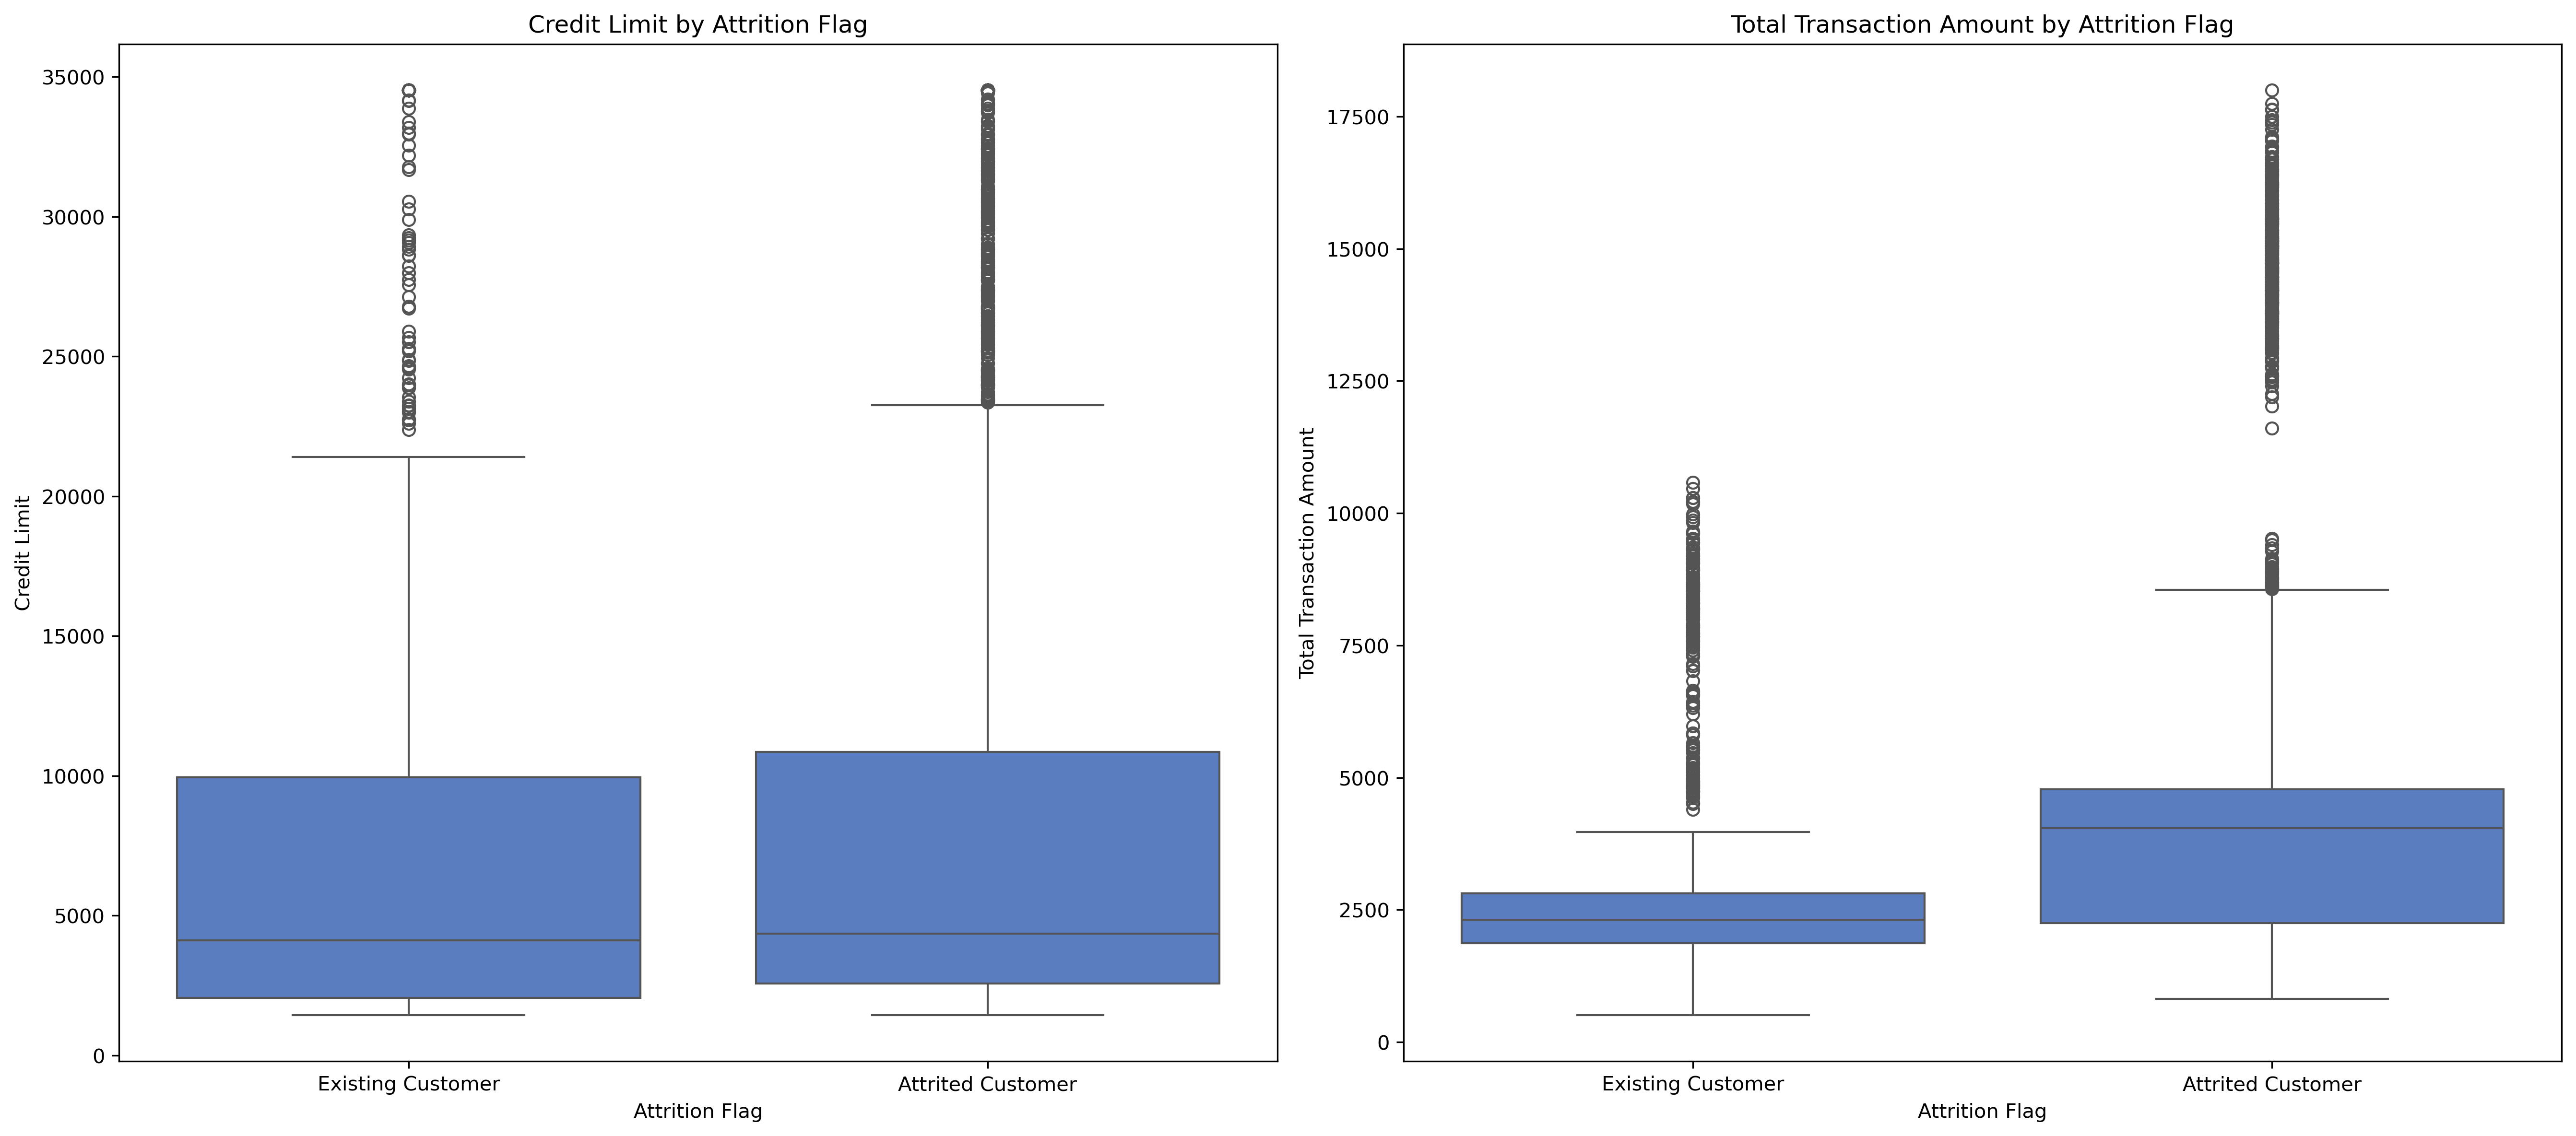

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:\\Users\\DD\\desktop\\BIS\\6335\\credit_card_churn_cleaned1.csv'  )

# Plot box plots for Credit_Limit and Total_Trans_Amt by Attrition_Flag
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Credit_Limit box plot
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=df, ax=axes[0])
axes[0].set_title('Credit Limit by Attrition Flag')
axes[0].set_xlabel('Attrition Flag')
axes[0].set_ylabel('Credit Limit')
axes[0].set_xticklabels(['Existing Customer', 'Attrited Customer'])

# Total_Trans_Amt box plot
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Amt', data=df, ax=axes[1])
axes[1].set_title('Total Transaction Amount by Attrition Flag')
axes[1].set_xlabel('Attrition Flag')
axes[1].set_ylabel('Total Transaction Amount')
axes[1].set_xticklabels(['Existing Customer', 'Attrited Customer'])

plt.tight_layout()
plt.show()


findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of 

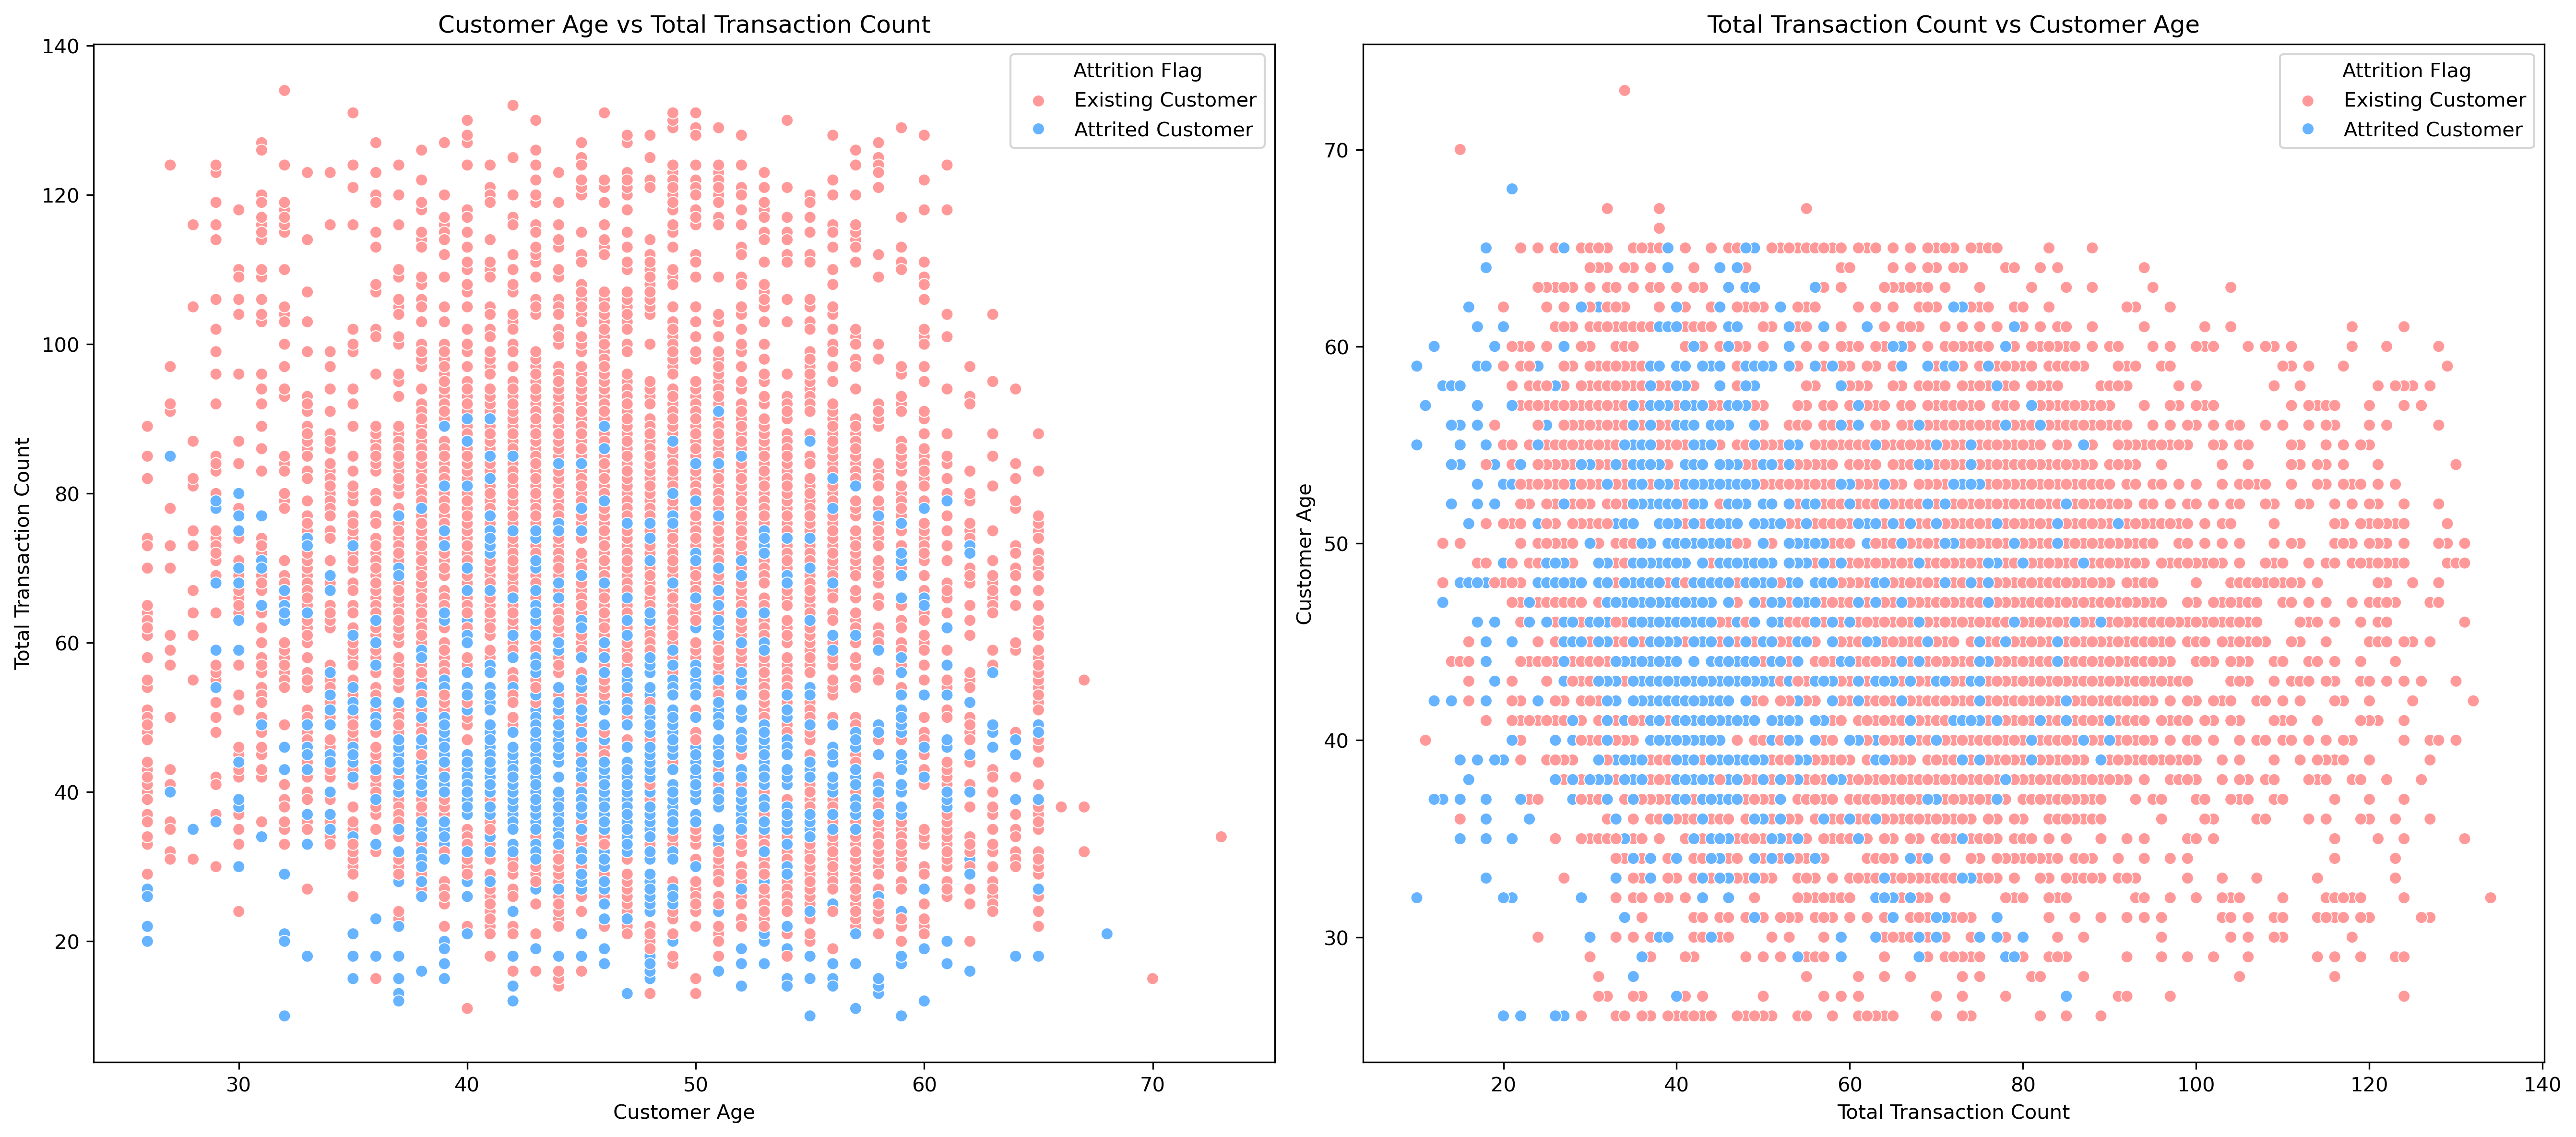

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:\\Users\\DD\\desktop\\BIS\\6335\\credit_card_churn_cleaned1.csv'  )

# Plot scatter plots for Customer_Age and Total_Trans_Ct by Attrition_Flag
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Customer_Age scatter plot
sns.scatterplot(x='Customer_Age', y='Total_Trans_Ct', hue='Attrition_Flag', data=df, ax=axes[0], palette=['#66b3ff', '#ff9999'])
axes[0].set_title('Customer Age vs Total Transaction Count')
axes[0].set_xlabel('Customer Age')
axes[0].set_ylabel('Total Transaction Count')
axes[0].legend(title='Attrition Flag', labels=['Existing Customer', 'Attrited Customer'])

# Total_Trans_Ct scatter plot
sns.scatterplot(x='Total_Trans_Ct', y='Customer_Age', hue='Attrition_Flag', data=df, ax=axes[1], palette=['#66b3ff', '#ff9999'])
axes[1].set_title('Total Transaction Count vs Customer Age')
axes[1].set_xlabel('Total Transaction Count')
axes[1].set_ylabel('Customer Age')
axes[1].legend(title='Attrition_Flag', labels=['Existing Customer', 'Attrited Customer'])

plt.tight_layout()
plt.show()



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
df1=pd.read_csv('C:\\Users\\DD\\desktop\\BIS\\6335\\credit_card_churn_cleaned1.csv'  )
df1['Income_Category'] = df1['Income_Category'].astype('category').cat.codes
df1.head()
df1.info()
y=df1["Attrition_Flag"]
X=df1.drop(["Attrition_Flag"],axis=1)
## divide training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=224) 
#print(X_train.shape[0],X_test.shape[0])
feature_name = list(X.columns)
clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=123)
clf = clf.fit(X_train, y_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7081 entries, 0 to 7080
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            7081 non-null   int64  
 1   Customer_Age              7081 non-null   int64  
 2   Gender                    7081 non-null   int64  
 3   Dependent_count           7081 non-null   int64  
 4   Education_Level           7081 non-null   int64  
 5   Marital_Status            7081 non-null   int64  
 6   Income_Category           7081 non-null   int8   
 7   Card_Category             7081 non-null   int64  
 8   Months_on_book            7081 non-null   int64  
 9   Total_Relationship_Count  7081 non-null   int64  
 10  Months_Inactive_12_mon    7081 non-null   int64  
 11  Contacts_Count_12_mon     7081 non-null   int64  
 12  Credit_Limit              7081 non-null   float64
 13  Total_Revolving_Bal       7081 non-null   int64  
 14  Avg_Open

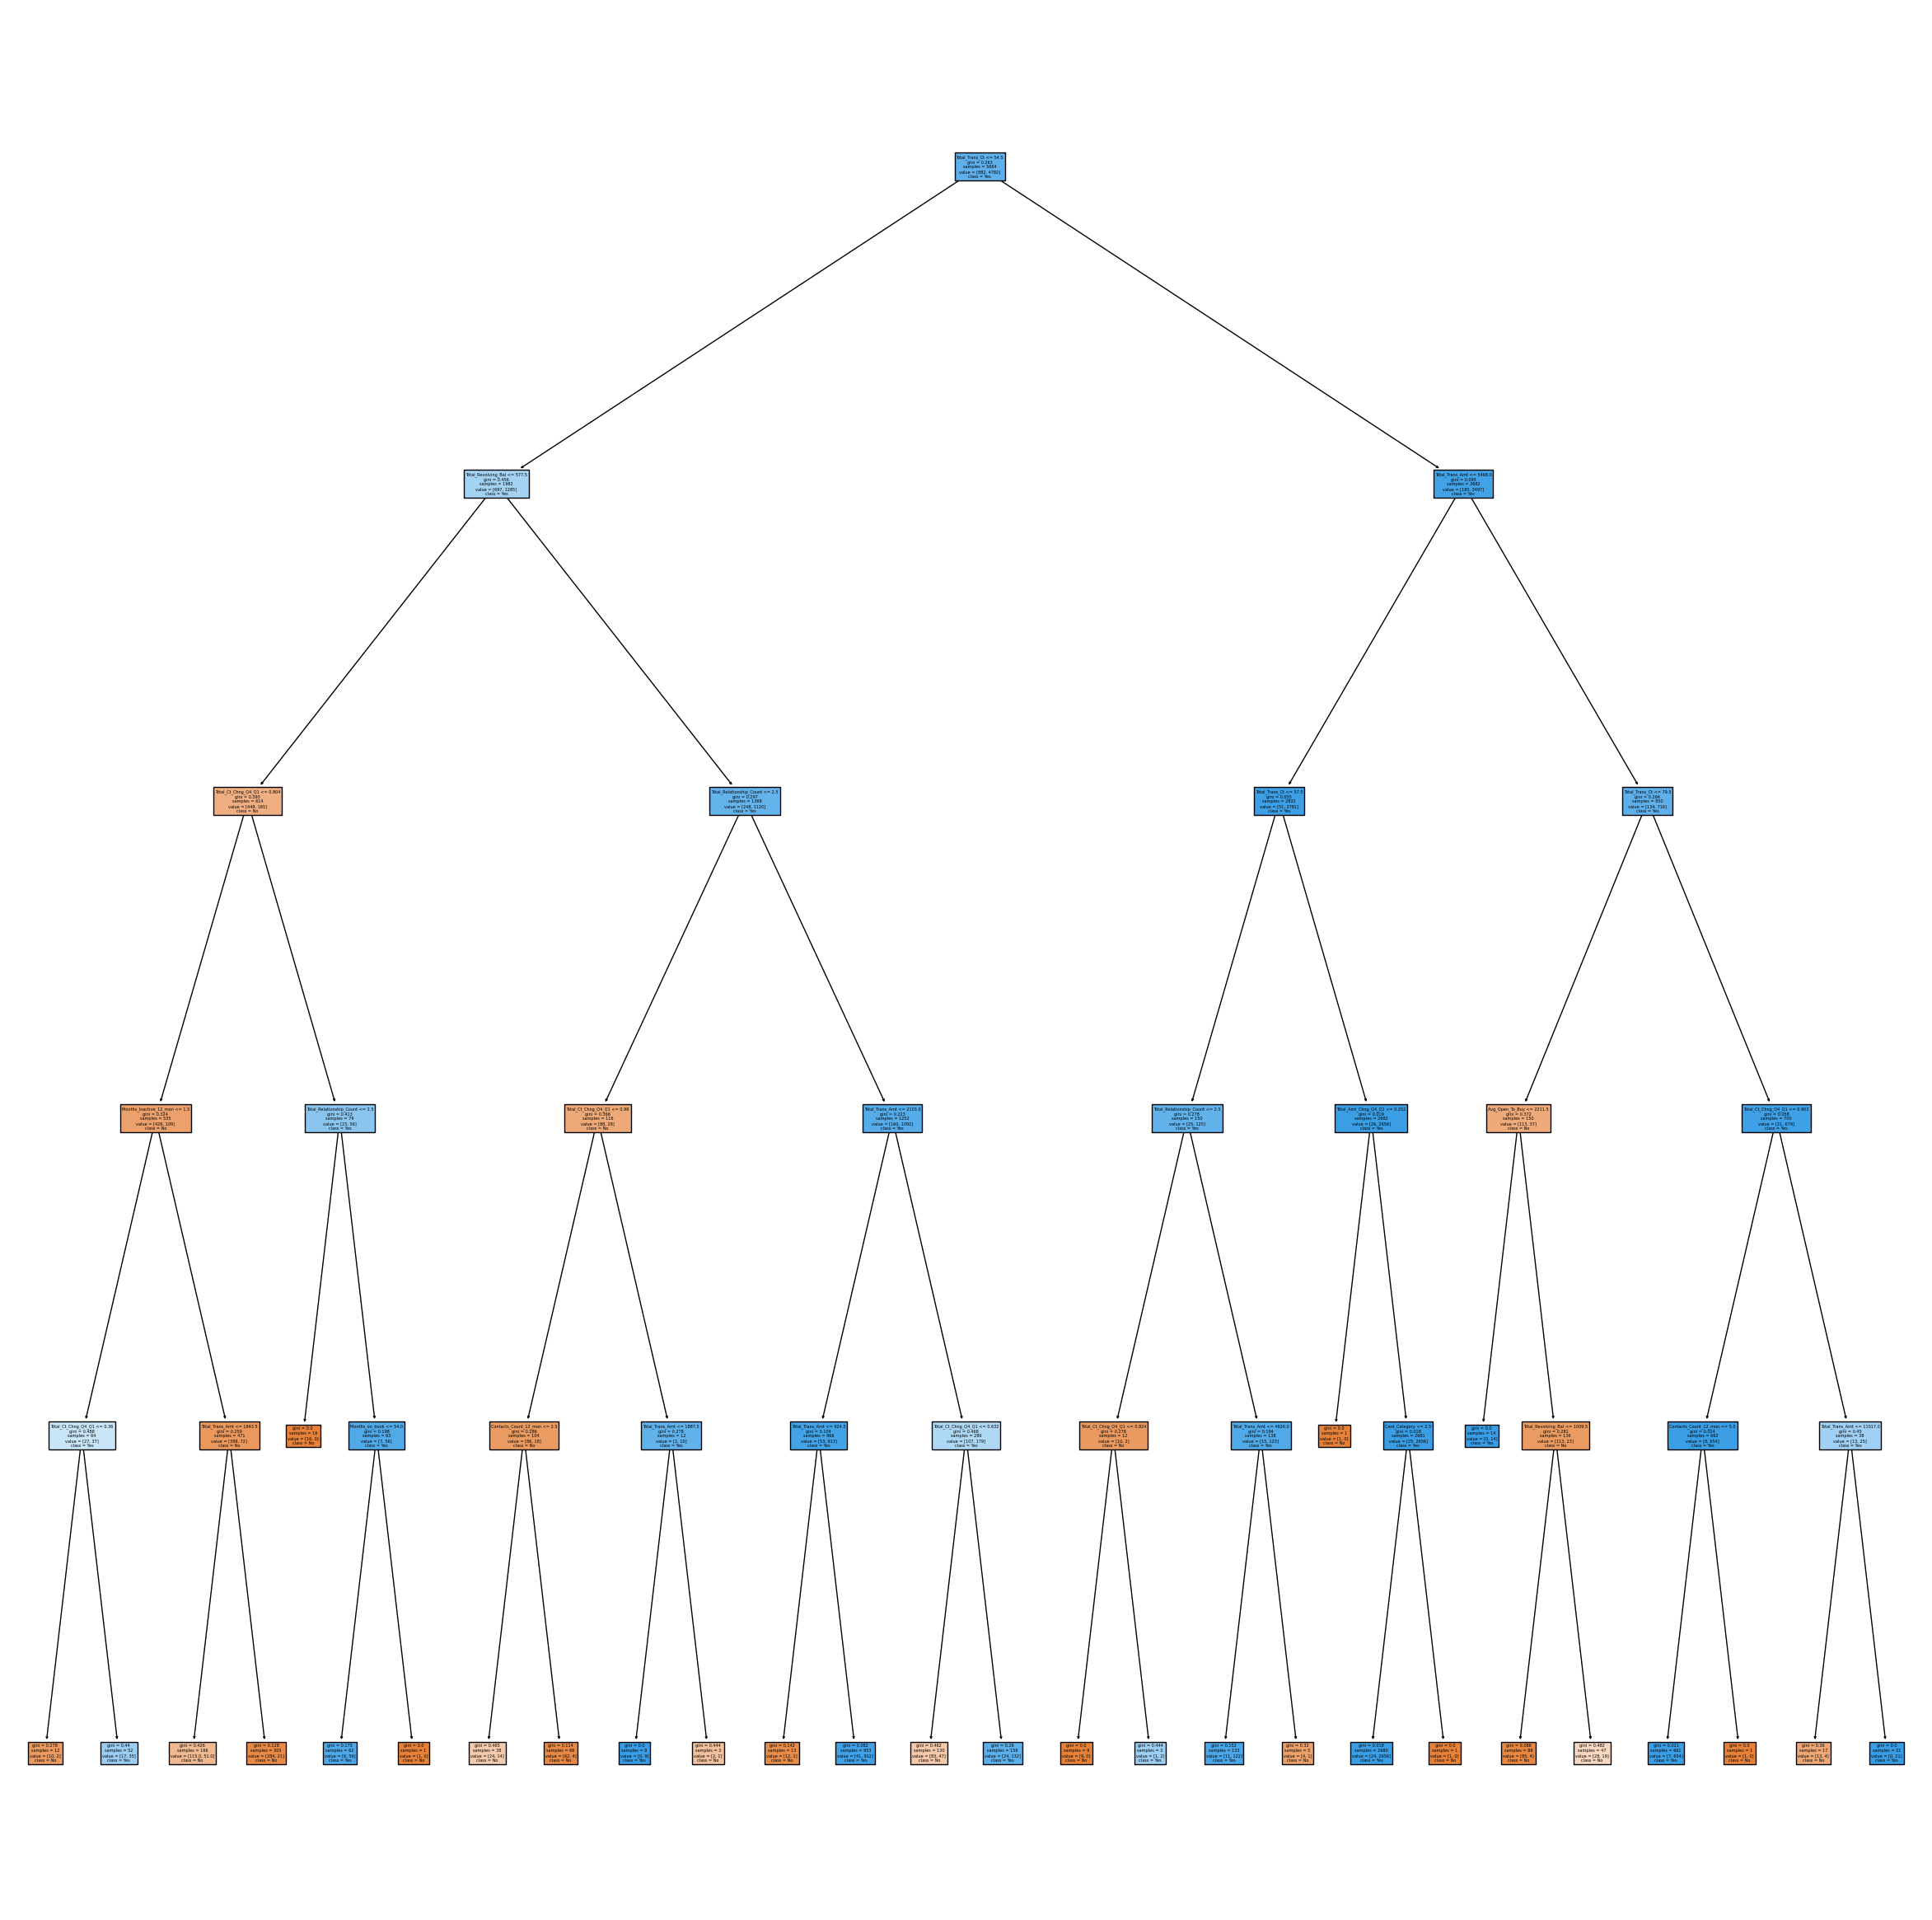

In [3]:
## visualization

plt.figure(figsize=(30,30))
tree.plot_tree(clf, feature_names= feature_name, class_names=["No","Yes"], filled = True)
plt.show()

Testing Dataset Accuracy: 0.9273112208892026
Testing Dataset Precision: 0.9577345731191885
Testing Dataset Recall: 0.9553119730185498
Testing Dataset F1 Score: 0.9565217391304348
[[ 181   50]
 [  53 1133]]


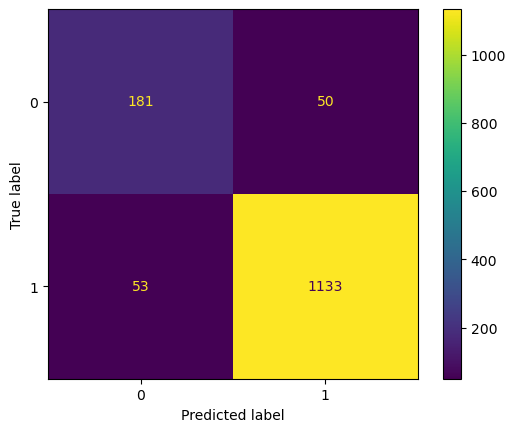

In [4]:
## evaluation
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

#print(classification_report(y_test,y_pred))
print("Testing Dataset Accuracy: " + str(acc))
print("Testing Dataset Precision: " + str(precision))
print("Testing Dataset Recall: " + str(recall))
print("Testing Dataset F1 Score: " + str(f1score))
print(confusion_matrix(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

Training Dataset Accuracy: 0.9470338983050848
Training Dataset Precision: 0.9723861720067454
Training Dataset Recall: 0.9646591384358009
Training Dataset F1 Score: 0.9685072433340332
[[ 751  131]
 [ 169 4613]]


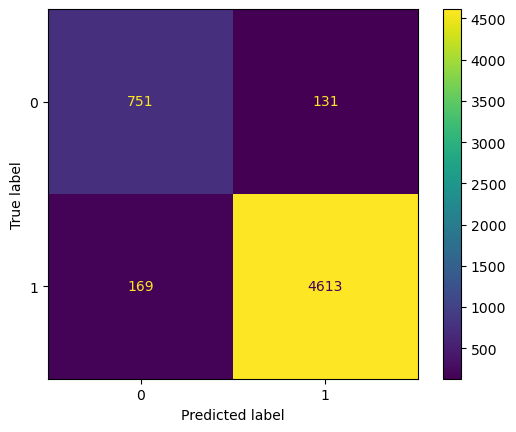

In [5]:
## Evaluate on training dataset
y_train_pred = clf.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1score = f1_score(y_train, y_train_pred)

print("Training Dataset Accuracy: " + str(train_acc))
print("Training Dataset Precision: " + str(train_precision))
print("Training Dataset Recall: " + str(train_recall))
print("Training Dataset F1 Score: " + str(train_f1score))
print(confusion_matrix(y_train, y_train_pred))

cm_train = confusion_matrix(y_train, y_train_pred, labels=clf.classes_)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=clf.classes_)
disp_train.plot()
plt.show()

Testing Dataset Accuracy: 0.8842625264643613
Testing Dataset Precision: 0.9088
Testing Dataset Recall: 0.9578414839797639
Testing Dataset F1 Score: 0.9326765188834154
[[ 117  114]
 [  50 1136]]


D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


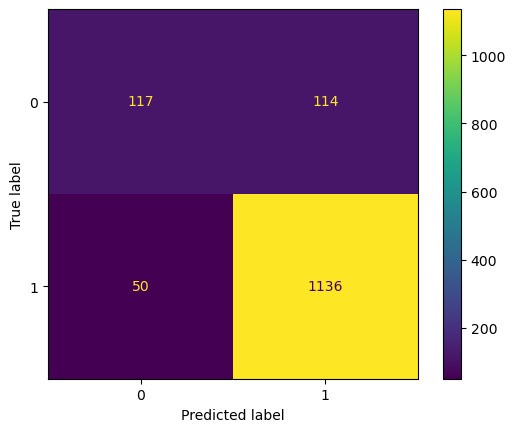

In [3]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

## model training
clf = LogisticRegression(solver='lbfgs', max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## evaluation
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

#print(classification_report(y_test,y_pred))
print("Testing Dataset Accuracy: " + str(acc))
print("Testing Dataset Precision: " + str(precision))
print("Testing Dataset Recall: " + str(recall))
print("Testing Dataset F1 Score: " + str(f1score))
print(confusion_matrix(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

<Figure size 1200x1000 with 0 Axes>

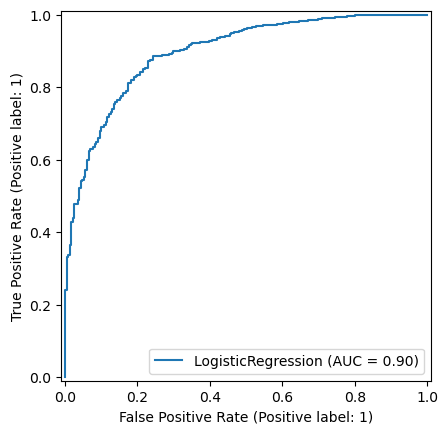

In [4]:
from sklearn.metrics import RocCurveDisplay
### ROC
plt.figure(figsize=(12,10))
roc = RocCurveDisplay.from_estimator(clf, X_test, y_test)

plt.show()